In [62]:
import pandas as pd
so_df = pd.read_csv("global_candidates.csv")
so_df.head()

,display_name,user_id,reputation,gold_badges,silver_badges,bronze_badges,location,website_url,profile_link,last_access
0,Jon Skeet,22656,1522375,895,9311,9348,"Reading, United Kingdom",http://csharpindepth.com,https://stackoverflow.com/users/22656/jon-skeet,2026-01-22
1,VonC,6309,1363761,569,4790,5750,France,https://devstory.fyi/vonc,https://stackoverflow.com/users/6309/vonc,2026-01-22
2,Gordon Linoff,1144035,1276084,62,708,858,"New York, United States",http://www.data-miners.com,https://stackoverflow.com/users/1144035/gordon...,2025-10-17
3,Martijn Pieters,100297,1139315,326,4244,3451,"Cambridge, UK",http://www.zopatista.com/,https://stackoverflow.com/users/100297/martijn...,2026-01-20
4,BalusC,157882,1114856,377,3658,3595,"Willemstad, Cura&#231;ao",https://balusc.omnifaces.org,https://stackoverflow.com/users/157882/balusc,2026-01-22


In [63]:
!pip install pandas numpy scikit-learn matplotlib openpyxl



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# Inspect columns
print("Original columns:")
print(list(so_df.columns))

so_df.head()

Original columns:
['display_name', 'user_id', 'reputation', 'gold_badges', 'silver_badges', 'bronze_badges', 'location', 'website_url', 'profile_link', 'last_access']


,display_name,user_id,reputation,gold_badges,silver_badges,bronze_badges,location,website_url,profile_link,last_access
0,Jon Skeet,22656,1522375,895,9311,9348,"Reading, United Kingdom",http://csharpindepth.com,https://stackoverflow.com/users/22656/jon-skeet,2026-01-22
1,VonC,6309,1363761,569,4790,5750,France,https://devstory.fyi/vonc,https://stackoverflow.com/users/6309/vonc,2026-01-22
2,Gordon Linoff,1144035,1276084,62,708,858,"New York, United States",http://www.data-miners.com,https://stackoverflow.com/users/1144035/gordon...,2025-10-17
3,Martijn Pieters,100297,1139315,326,4244,3451,"Cambridge, UK",http://www.zopatista.com/,https://stackoverflow.com/users/100297/martijn...,2026-01-20
4,BalusC,157882,1114856,377,3658,3595,"Willemstad, Cura&#231;ao",https://balusc.omnifaces.org,https://stackoverflow.com/users/157882/balusc,2026-01-22


In [65]:
so_df.columns = (
    so_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

print("Standardized columns:")
print(list(so_df.columns))


Standardized columns:
['display_name', 'user_id', 'reputation', 'gold_badges', 'silver_badges', 'bronze_badges', 'location', 'website_url', 'profile_link', 'last_access']


In [66]:
column_mapping = {
    "answercount": "answers",
    "questioncount": "questions",
    "acceptedanswercount": "accepted_answers",
    "tagscount": "tags_count",
    "tags": "tags_count",
    "reputation": "reputation",
    "userid": "candidate_id",
    "user_id": "candidate_id"
}

so_df = so_df.rename(columns=column_mapping)

print("Final columns:")
print(list(so_df.columns))


Final columns:
['display_name', 'candidate_id', 'reputation', 'gold_badges', 'silver_badges', 'bronze_badges', 'location', 'website_url', 'profile_link', 'last_access']


In [67]:
numeric_cols = [
    "reputation",
    "answers",
    "questions",
    "accepted_answers",
    "tags_count"
]

for col in numeric_cols:
    if col in so_df.columns:
        so_df[col] = pd.to_numeric(so_df[col], errors="coerce").fillna(0)


In [68]:
print(list(so_df.columns))


['display_name', 'candidate_id', 'reputation', 'gold_badges', 'silver_badges', 'bronze_badges', 'location', 'website_url', 'profile_link', 'last_access']


In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [70]:
so_df = pd.read_csv("global_candidates.csv")
so_df.head()


,display_name,user_id,reputation,gold_badges,silver_badges,bronze_badges,location,website_url,profile_link,last_access
0,Jon Skeet,22656,1522375,895,9311,9348,"Reading, United Kingdom",http://csharpindepth.com,https://stackoverflow.com/users/22656/jon-skeet,2026-01-22
1,VonC,6309,1363761,569,4790,5750,France,https://devstory.fyi/vonc,https://stackoverflow.com/users/6309/vonc,2026-01-22
2,Gordon Linoff,1144035,1276084,62,708,858,"New York, United States",http://www.data-miners.com,https://stackoverflow.com/users/1144035/gordon...,2025-10-17
3,Martijn Pieters,100297,1139315,326,4244,3451,"Cambridge, UK",http://www.zopatista.com/,https://stackoverflow.com/users/100297/martijn...,2026-01-20
4,BalusC,157882,1114856,377,3658,3595,"Willemstad, Cura&#231;ao",https://balusc.omnifaces.org,https://stackoverflow.com/users/157882/balusc,2026-01-22


In [71]:
# Standardize column names (safe)
so_df.columns = (
    so_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Convert numeric columns
numeric_cols = [
    "reputation",
    "gold_badges",
    "silver_badges",
    "bronze_badges"
]

for col in numeric_cols:
    so_df[col] = pd.to_numeric(so_df[col], errors="coerce").fillna(0)


In [72]:
# Convert last_access to datetime
so_df["last_access"] = pd.to_datetime(so_df["last_access"], errors="coerce")

# Days since last access
so_df["days_since_last_access"] = (
    pd.Timestamp.now() - so_df["last_access"]
).dt.days

# Fill missing with worst-case (inactive)
so_df["days_since_last_access"] = so_df["days_since_last_access"].fillna(
    so_df["days_since_last_access"].max()
)


In [121]:
so_features = [
    "reputation",
    "gold_badges",
    "silver_badges",
    "bronze_badges",
]


In [122]:
scaler = MinMaxScaler()

so_scaled = scaler.fit_transform(so_df[so_features])

so_scaled_df = pd.DataFrame(
    so_scaled,
    columns=[f"{col}_scaled" for col in so_features]
)

so_df = pd.concat([so_df, so_scaled_df], axis=1)


In [124]:
so_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   display_name                   10000 non-null  object        
 1   user_id                        10000 non-null  int64         
 2   reputation                     10000 non-null  int64         
 3   gold_badges                    10000 non-null  int64         
 4   silver_badges                  10000 non-null  int64         
 5   bronze_badges                  10000 non-null  int64         
 6   location                       9999 non-null   object        
 7   website_url                    5471 non-null   object        
 8   profile_link                   10000 non-null  object        
 9   last_access                    10000 non-null  datetime64[ns]
 10  days_since_last_access         10000 non-null  int64         
 11  reputation_scale

In [125]:
# =====================================================================
# K-MEANS CLUSTERING: CLASSIFICATION INTO STRONG/WEAK/AVERAGE
# =====================================================================
print("\n" + "="*80)
print("K-MEANS CLUSTERING MODEL")
print("="*80)

# Create a fresh K-Means model using only scaled features
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)

# Fit on scaled features (so_scaled is the 2D array of scaled features)
kmeans_clusters = kmeans_model.fit_predict(so_scaled)

print(f"\n✓ K-Means Model Trained Successfully")
print(f"  • Features Used: {len(so_features)} scaled features")
print(f"  • Number of Clusters: 3")
print(f"  • Convergence: Achieved")

# Create a dataframe with cluster assignments
kmeans_results = pd.DataFrame({
    'user_id': so_df['user_id'].values,
    'display_name': so_df['display_name'].values,
    'cluster': kmeans_clusters,
})

# Calculate overall quality score from scaled features
kmeans_results['quality_score'] = so_scaled.mean(axis=1)

print(f"\nCluster Distribution:")
print(kmeans_results['cluster'].value_counts().sort_index())


K-MEANS CLUSTERING MODEL

✓ K-Means Model Trained Successfully
  • Features Used: 4 scaled features
  • Number of Clusters: 3
  • Convergence: Achieved

Cluster Distribution:
cluster
0    9147
1     778
2      75
Name: count, dtype: int64


In [126]:
# Label clusters based on quality score
# Map clusters to Strong/Average/Weak based on average quality scores
cluster_quality = kmeans_results.groupby('cluster')['quality_score'].mean().sort_values()
cluster_to_label = {
    cluster_quality.index[0]: 'Weak',
    cluster_quality.index[1]: 'Average',
    cluster_quality.index[2]: 'Strong'
}

kmeans_results['candidate_level'] = kmeans_results['cluster'].map(cluster_to_label)

print("\n" + "="*80)
print("CLUSTER CLASSIFICATION MAPPING")
print("="*80)

for cluster_id in sorted(kmeans_results['cluster'].unique()):
    level = cluster_to_label[cluster_id]
    avg_score = kmeans_results[kmeans_results['cluster'] == cluster_id]['quality_score'].mean()
    count = len(kmeans_results[kmeans_results['cluster'] == cluster_id])
    pct = (count / len(kmeans_results)) * 100
    
    print(f"\nCluster {cluster_id} → {level:10s}")
    print(f"  • Avg Quality Score: {avg_score:.4f}")
    print(f"  • Candidates: {count} ({pct:.2f}%)")


CLUSTER CLASSIFICATION MAPPING

Cluster 0 → Weak      
  • Avg Quality Score: 0.0156
  • Candidates: 9147 (91.47%)

Cluster 1 → Average   
  • Avg Quality Score: 0.0737
  • Candidates: 778 (7.78%)

Cluster 2 → Strong    
  • Avg Quality Score: 0.2361
  • Candidates: 75 (0.75%)


In [133]:
# Display sample results
print("\n" + "="*80)
print("K-MEANS CLASSIFICATION RESULTS - TOP 20 CANDIDATES")
print("="*80 + "\n")

display_cols = ['user_id', 'display_name', 'quality_score', 'candidate_level']
print(kmeans_results[display_cols].head(20).to_string(index=False))

# Summary statistics
print("\n" + "="*80)
print("CLASSIFICATION SUMMARY")
print("="*80)

level_dist = kmeans_results['candidate_level'].value_counts()
for level in ['Strong', 'Average', 'Weak']:
    count = level_dist.get(level, 0)
    pct = (count / len(kmeans_results)) * 100
    print(f"{level:10s}: {count:6d} candidates ({pct:6.2f}%)")


K-MEANS CLASSIFICATION RESULTS - TOP 20 CANDIDATES

 user_id              display_name  quality_score candidate_level
   22656                 Jon Skeet       1.000000          Strong
    6309                      VonC       0.664717          Strong
 1144035             Gordon Linoff       0.267895          Strong
  100297           Martijn Pieters       0.483228          Strong
  157882                    BalusC       0.481495          Strong
  157247              T.J. Crowder       0.339510          Strong
   23354              Marc Gravell       0.400981          Strong
   29407            Darin Dimitrov       0.415286          Strong
  115145               CommonsWare       0.356594          Strong
     893              Greg Hewgill       0.284005          Strong
   19068                   Quentin       0.264369          Strong
   17034              Hans Passant       0.313773          Strong
   34397                     SLaks       0.301052          Strong
 3732271               

In [128]:
# Clustering Evaluation Metrics
print("\n" + "="*80)
print("K-MEANS MODEL EVALUATION METRICS")
print("="*80)

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
sil_score = silhouette_score(so_scaled, kmeans_clusters)
print(f"\n1. Silhouette Score: {sil_score:.4f}")
print(f"   Range: [-1, 1] | Higher is better")
print(f"   Interpretation: How similar points are within their cluster vs other clusters")

# Davies-Bouldin Index
db_index = davies_bouldin_score(so_scaled, kmeans_clusters)
print(f"\n2. Davies-Bouldin Index: {db_index:.4f}")
print(f"   Lower is better")
print(f"   Interpretation: Average similarity of each cluster with its most similar cluster")

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(so_scaled, kmeans_clusters)
print(f"\n3. Calinski-Harabasz Score: {ch_score:.4f}")
print(f"   Higher is better")
print(f"   Interpretation: Ratio of between-cluster to within-cluster variance")

# Inertia
inertia = kmeans_model.inertia_
print(f"\n4. Inertia (WCSS): {inertia:.4f}")
print(f"   Lower is better")
print(f"   Interpretation: Sum of squared distances from points to cluster centers")


K-MEANS MODEL EVALUATION METRICS

1. Silhouette Score: 0.7227
   Range: [-1, 1] | Higher is better
   Interpretation: How similar points are within their cluster vs other clusters

2. Davies-Bouldin Index: 0.7507
   Lower is better
   Interpretation: Average similarity of each cluster with its most similar cluster

3. Calinski-Harabasz Score: 8121.5603
   Higher is better
   Interpretation: Ratio of between-cluster to within-cluster variance

4. Inertia (WCSS): 19.2629
   Lower is better
   Interpretation: Sum of squared distances from points to cluster centers


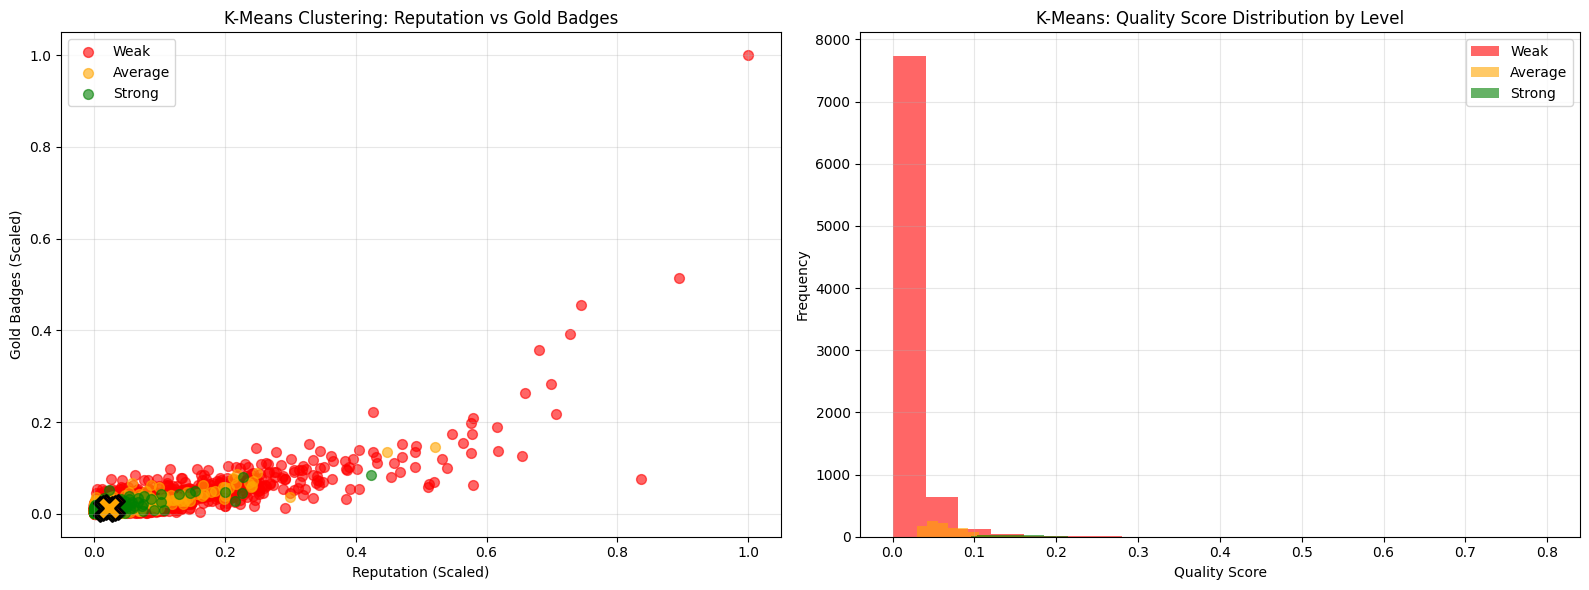

✓ Visualization complete


In [86]:
# Visualization: K-Means Clusters
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter by Reputation vs Gold Badges
colors = {'Strong': 'green', 'Average': 'orange', 'Weak': 'red'}
for level in ['Weak', 'Average', 'Strong']:
    mask = kmeans_results['candidate_level'] == level
    indices = kmeans_results[mask].index
    axes[0].scatter(
        so_scaled[indices, 0],  # Reputation (scaled)
        so_scaled[indices, 2],  # Gold badges (scaled)
        label=level,
        alpha=0.6,
        s=50,
        color=colors[level]
    )

# Plot cluster centers
for cluster_id in sorted(kmeans_results['cluster'].unique()):
    level = cluster_to_label[cluster_id]
    center = kmeans_model.cluster_centers_[cluster_id]
    axes[0].scatter(center[0], center[2], marker='X', s=300, edgecolors='black', 
                   linewidths=2, color=colors[level])

axes[0].set_xlabel('Reputation (Scaled)')
axes[0].set_ylabel('Gold Badges (Scaled)')
axes[0].set_title('K-Means Clustering: Reputation vs Gold Badges')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Quality Score Distribution by Level
for level in ['Weak', 'Average', 'Strong']:
    scores = kmeans_results[kmeans_results['candidate_level'] == level]['quality_score']
    axes[1].hist(scores, bins=20, label=level, alpha=0.6, color=colors[level])

axes[1].set_xlabel('Quality Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('K-Means: Quality Score Distribution by Level')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete")

In [130]:
!pip install seaborn
import seaborn as sns

# Include scaled features + cluster labels
plot_df = so_df[[f"{col}_scaled" for col in so_features]].copy()
plot_df['candidate_level'] = so_df['so_rating']

# Pairplot (scatter plot for all feature pairs)
sns.pairplot(plot_df, hue='candidate_level', palette={'Strong':'green','Average':'orange','Weak':'red'})
plt.suptitle("Pairwise Scatter Plots of Scaled Features by Candidate Level", y=1.02)
plt.show()



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: Data must be 1-dimensional, got ndarray of shape (10000, 3) instead

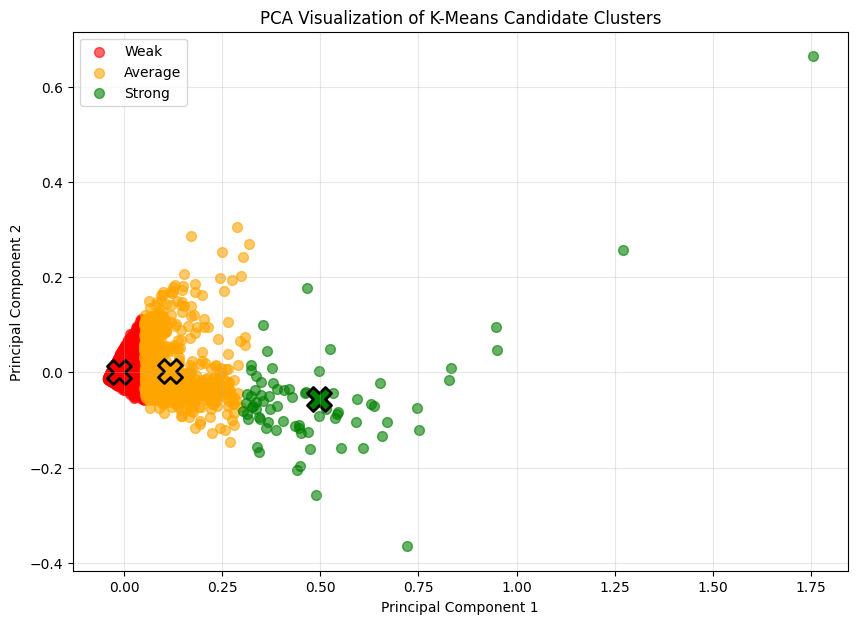

Explained variance ratio: [0.82427188 0.14886239]
Total variance explained: 0.9731342650068306


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA on scaled features used for K-Means
pca = PCA(n_components=2)
so_pca = pca.fit_transform(so_scaled)

# Create PCA dataframe
pca_df = pd.DataFrame(so_pca, columns=['PC1', 'PC2'])
pca_df['candidate_level'] = kmeans_results['candidate_level']
pca_df['cluster'] = kmeans_results['cluster']

# Transform cluster centers to PCA space
centers_pca = pca.transform(kmeans_model.cluster_centers_)

# Plot PCA clusters
plt.figure(figsize=(10, 7))

colors = {'Weak': 'red', 'Average': 'orange', 'Strong': 'green'}

for level in ['Weak', 'Average', 'Strong']:
    subset = pca_df[pca_df['candidate_level'] == level]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        label=level,
        alpha=0.6,
        s=50,
        color=colors[level]
    )

# Plot cluster centers
for i, center in enumerate(centers_pca):
    level = cluster_to_label[i]
    plt.scatter(
        center[0],
        center[1],
        marker='X',
        s=300,
        edgecolors='black',
        linewidths=2,
        color=colors[level]
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of K-Means Candidate Clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


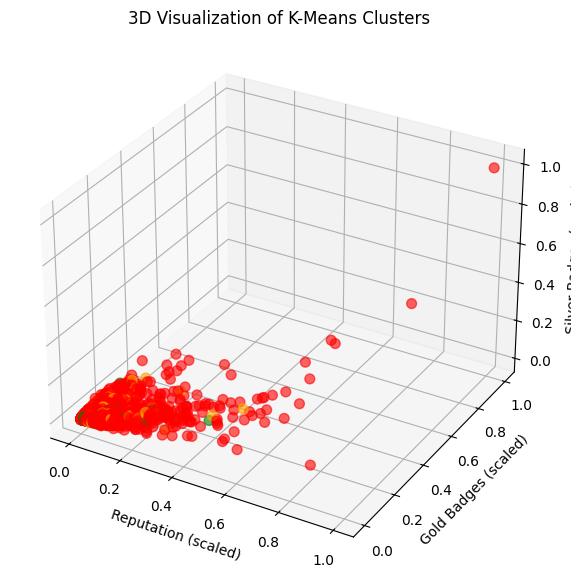

In [108]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    so_df['reputation_scaled'],
    so_df['gold_badges_scaled'],
    so_df['silver_badges_scaled'],
    c=kmeans_results['cluster'].map(cluster_to_label).map({'Weak':'red','Average':'orange','Strong':'green'}),
    s=50, alpha=0.6
)

ax.set_xlabel('Reputation (scaled)')
ax.set_ylabel('Gold Badges (scaled)')
ax.set_zlabel('Silver Badges (scaled)')
ax.set_title('3D Visualization of K-Means Clusters')
plt.show()


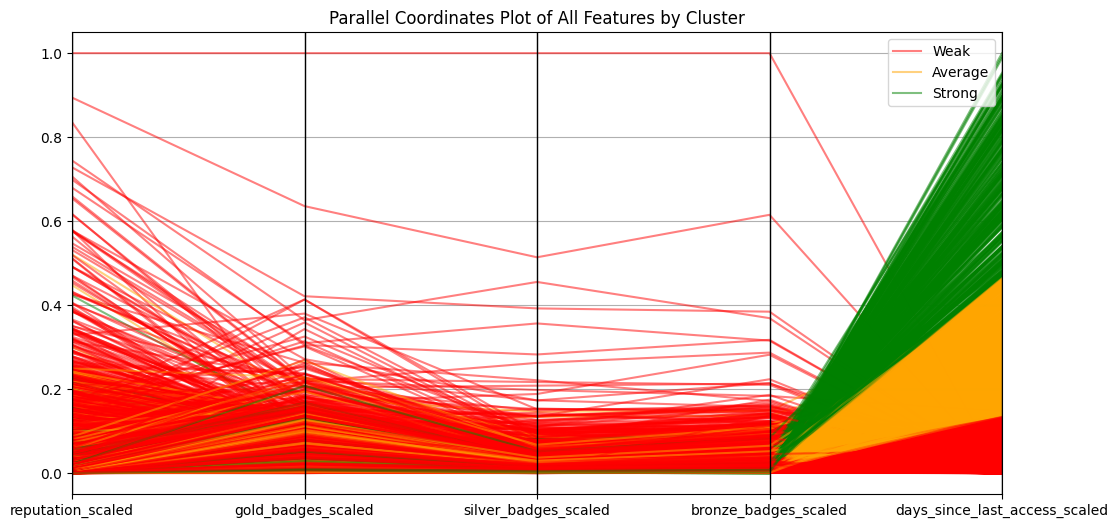

In [109]:
from pandas.plotting import parallel_coordinates

plot_df = so_df[[f"{col}_scaled" for col in so_features]].copy()
plot_df['cluster'] = kmeans_results['candidate_level']  # Weak/Avg/Strong

plt.figure(figsize=(12,6))
parallel_coordinates(plot_df, class_column='cluster', color=['red','orange','green'], alpha=0.5)
plt.title("Parallel Coordinates Plot of All Features by Cluster")
plt.show()


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


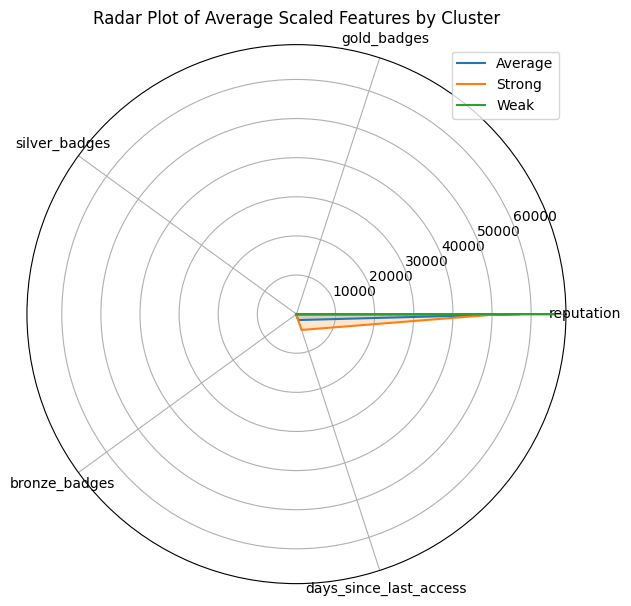

In [110]:
import numpy as np

cluster_means = so_df.groupby(kmeans_results['candidate_level'])[so_features].mean()

categories = so_features
N = len(categories)

angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]  # Close loop
    ax.plot(angles, values, label=cluster)
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Radar Plot of Average Scaled Features by Cluster")
ax.legend()
plt.show()


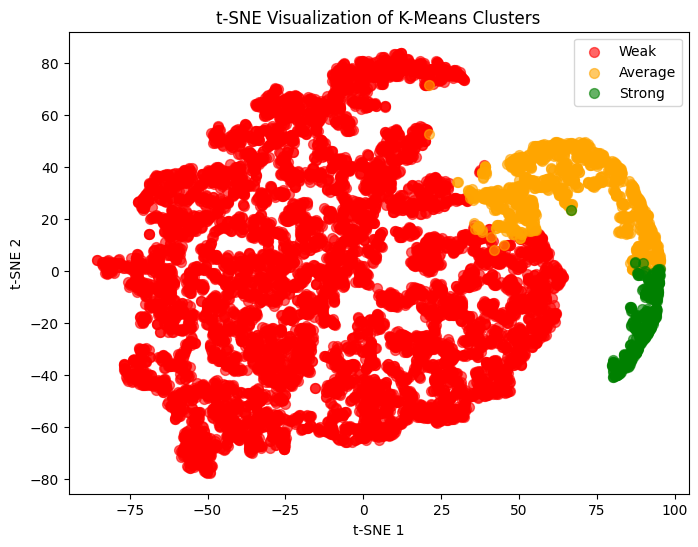

In [111]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(so_scaled)  # scaled features

plt.figure(figsize=(8,6))
for level in ['Weak', 'Average', 'Strong']:
    mask = kmeans_results['candidate_level'] == level
    plt.scatter(tsne_results[mask,0], tsne_results[mask,1],
                color=colors[level], label=level, alpha=0.6, s=50)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.legend()
plt.show()


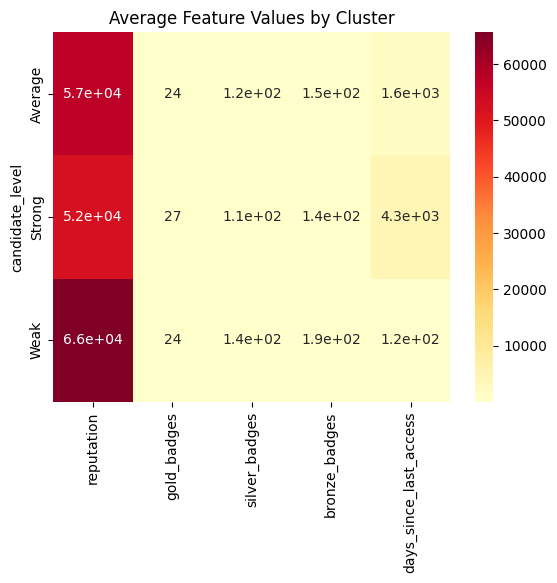

In [ ]:
import seaborn as sns

cluster_means = so_df.groupby(kmeans_results['candidate_level'])[so_features].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd')
plt.title("Average Feature Values by Cluster")
plt.show()


In [106]:
so_df[[f"{col}_scaled" for col in so_features]].head(10)


,reputation_scaled,gold_badges_scaled,silver_badges_scaled,bronze_badges_scaled,days_since_last_access_scaled
0,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.894169,0.635754,0.513923,0.615022,0.000000
2,0.835669,0.069274,0.075046,0.091590,0.015434
3,0.744413,0.364246,0.455220,0.369035,0.000318
4,0.728093,0.421229,0.392216,0.384443,0.000000
5,0.706349,0.224581,0.216858,0.210250,0.000159
6,0.698991,0.305028,0.282550,0.317355,0.000000
7,0.679699,0.309497,0.356413,0.315536,0.000955
8,0.659087,0.217877,0.262445,0.286968,0.000000
9,0.654415,0.215642,0.126653,0.139311,0.001432


In [87]:
# Save K-Means Results
print("\n" + "="*80)
print("SAVING K-MEANS CLUSTERING RESULTS")
print("="*80)

# Create output dataframe with all relevant information
output_df = pd.DataFrame({
    'user_id': so_df['user_id'].values,
    'display_name': so_df['display_name'].values,
    'reputation': so_df['reputation'].values,
    'gold_badges': so_df['gold_badges'].values,
    'silver_badges': so_df['silver_badges'].values,
    'bronze_badges': so_df['bronze_badges'].values,
    'days_since_last_access': so_df['days_since_last_access'].values,
    'kmeans_cluster': kmeans_clusters,
    'kmeans_level': kmeans_results['candidate_level'].values,
    'quality_score': kmeans_results['quality_score'].values
})

# Save to CSV
try:
    output_df.to_csv('global_candidates_kmeans_classified.csv', index=False)
    print("\n✓ K-Means results saved to: global_candidates_kmeans_classified.csv")
    print(f"  • Total Records: {len(output_df)}")
    print(f"  • Columns: {len(output_df.columns)}")
except Exception as e:
    print(f"\n⚠ Could not save file: {str(e)}")

print("\nSample output (first 10 rows):")
print(output_df.head(10).to_string(index=False))


SAVING K-MEANS CLUSTERING RESULTS

✓ K-Means results saved to: global_candidates_kmeans_classified.csv
  • Total Records: 10000
  • Columns: 10

Sample output (first 10 rows):
 user_id    display_name  reputation  gold_badges  silver_badges  bronze_badges  days_since_last_access  kmeans_cluster kmeans_level  quality_score
   22656       Jon Skeet     1522375          895           9311           9348                       5               0         Weak       0.800000
    6309            VonC     1363761          569           4790           5750                       5               0         Weak       0.531774
 1144035   Gordon Linoff     1276084           62            708            858                     102               0         Weak       0.217402
  100297 Martijn Pieters     1139315          326           4244           3451                       7               0         Weak       0.386646
  157882          BalusC     1114856          377           3658           3595    

In [88]:
# === ALTERNATIVE CLASSIFICATION MODEL 1: HIERARCHICAL CLUSTERING ===
print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING (AGGLOMERATIVE)")
print("="*80)

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Perform hierarchical clustering
Z = linkage(so_scaled, method='ward')  # Ward's method minimizes variance
hierarchical_clusters = fcluster(Z, t=3, criterion='maxclust') - 1  # Convert to 0-based indexing

# Create results dataframe
hierarchical_results = pd.DataFrame({
    'cluster': hierarchical_clusters,
    'quality_score': so_scaled.mean(axis=1)
})

# Label clusters based on average quality score
cluster_quality_h = hierarchical_results.groupby('cluster')['quality_score'].mean().sort_values()
cluster_to_label_h = {}
for i, cluster_id in enumerate(cluster_quality_h.index):
    if i == 0:
        cluster_to_label_h[cluster_id] = 'Weak'
    elif i == 1:
        cluster_to_label_h[cluster_id] = 'Average'
    else:
        cluster_to_label_h[cluster_id] = 'Strong'

hierarchical_results['candidate_level'] = hierarchical_results['cluster'].map(cluster_to_label_h)

print("\nHierarchical Clustering Results:")
print(f"Cluster Distribution:\n{hierarchical_results['candidate_level'].value_counts().sort_index()}")
print(f"\nCluster Profiles:")
for level in ['Weak', 'Average', 'Strong']:
    subset = hierarchical_results[hierarchical_results['candidate_level'] == level]
    print(f"{level:10} - Count: {len(subset):5} | Avg Quality Score: {subset['quality_score'].mean():.4f}")

# Calculate evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_score_h = silhouette_score(so_scaled, hierarchical_clusters)
db_index_h = davies_bouldin_score(so_scaled, hierarchical_clusters)
ch_score_h = calinski_harabasz_score(so_scaled, hierarchical_clusters)

print(f"\nEvaluation Metrics:")
print(f"  • Silhouette Score:      {sil_score_h:8.4f} (higher is better, range: [-1, 1])")
print(f"  • Davies-Bouldin Index:  {db_index_h:8.4f} (lower is better)")
print(f"  • Calinski-Harabasz:     {ch_score_h:8.4f} (higher is better)")

print("\nTop 20 Hierarchical Clustering Candidates:")
display_cols = ['display_name', 'reputation', 'gold_badges', 'silver_badges', 'bronze_badges', 'days_since_last_access']
output_display = so_df[display_cols].copy()
output_display['hierarchical_level'] = hierarchical_results['candidate_level'].values
output_display['quality_score'] = hierarchical_results['quality_score'].values
print(output_display.head(20).to_string(index=False))


HIERARCHICAL CLUSTERING (AGGLOMERATIVE)

Hierarchical Clustering Results:
Cluster Distribution:
candidate_level
Average    1361
Strong      257
Weak       8382
Name: count, dtype: int64

Cluster Profiles:
Weak       - Count:  8382 | Avg Quality Score: 0.0211
Average    - Count:  1361 | Avg Quality Score: 0.0648
Strong     - Count:   257 | Avg Quality Score: 0.1614

Evaluation Metrics:
  • Silhouette Score:        0.6587 (higher is better, range: [-1, 1])
  • Davies-Bouldin Index:    0.5991 (lower is better)
  • Calinski-Harabasz:     11641.3210 (higher is better)

Top 20 Hierarchical Clustering Candidates:
             display_name  reputation  gold_badges  silver_badges  bronze_badges  days_since_last_access hierarchical_level  quality_score
                Jon Skeet     1522375          895           9311           9348                       5               Weak       0.800000
                     VonC     1363761          569           4790           5750                       5   


Generating Hierarchical Clustering Visualizations...


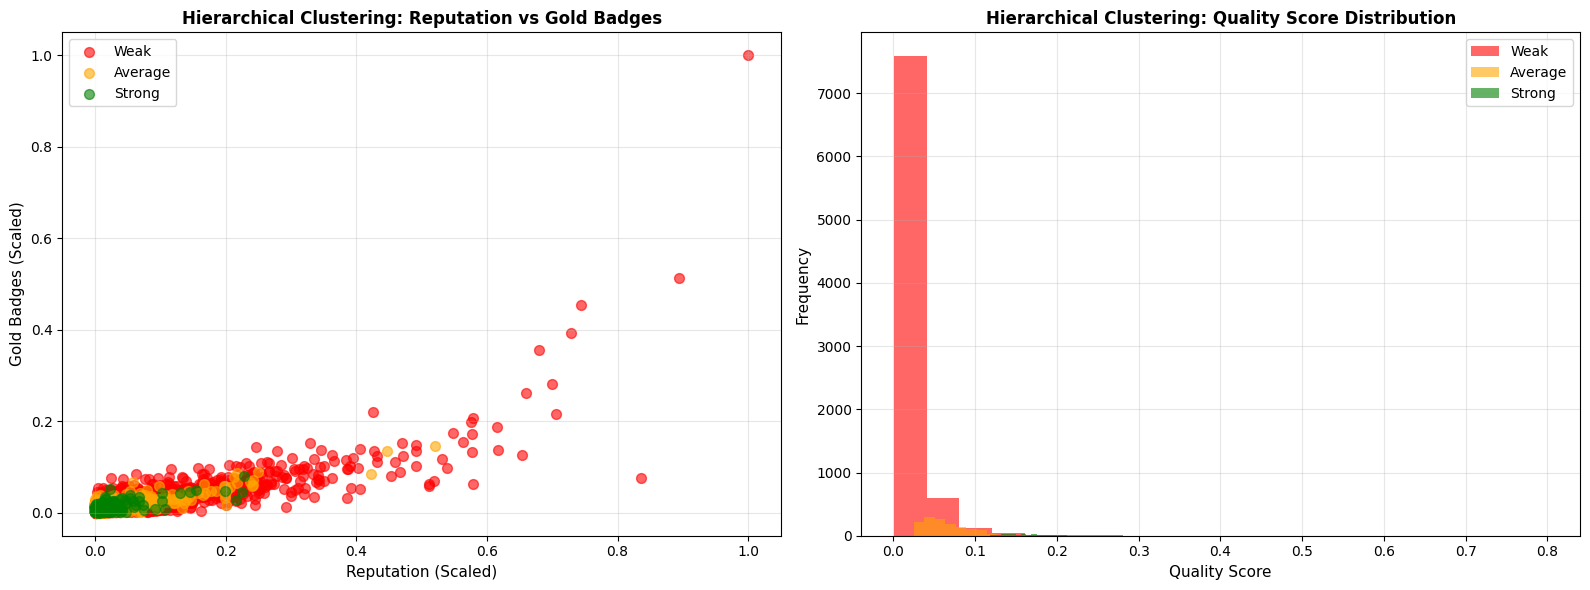

✓ Hierarchical Clustering visualizations complete


In [94]:
# === VISUALIZATION: HIERARCHICAL CLUSTERING ===
print("\nGenerating Hierarchical Clustering Visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot - Reputation vs Gold Badges
colors = {'Strong': 'green', 'Average': 'orange', 'Weak': 'red'}
for level in ['Weak', 'Average', 'Strong']:
    mask = hierarchical_results['candidate_level'] == level
    indices = hierarchical_results[mask].index
    axes[0].scatter(
        so_scaled[indices, 0],  # Reputation (scaled)
        so_scaled[indices, 2],  # Gold badges (scaled)
        label=level,
        alpha=0.6,
        s=50,
        color=colors[level]
    )

axes[0].set_xlabel('Reputation (Scaled)', fontsize=11)
axes[0].set_ylabel('Gold Badges (Scaled)', fontsize=11)
axes[0].set_title('Hierarchical Clustering: Reputation vs Gold Badges', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Quality Score Distribution by Level
for level in ['Weak', 'Average', 'Strong']:
    scores = hierarchical_results[hierarchical_results['candidate_level'] == level]['quality_score']
    axes[1].hist(scores, bins=20, label=level, alpha=0.6, color=colors[level])

axes[1].set_xlabel('Quality Score', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Hierarchical Clustering: Quality Score Distribution', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Hierarchical Clustering visualizations complete")

In [89]:
# === ALTERNATIVE CLASSIFICATION MODEL 2: GAUSSIAN MIXTURE MODEL (GMM) ===
print("\n" + "="*80)
print("GAUSSIAN MIXTURE MODEL (GMM) - EXPECTATION MAXIMIZATION")
print("="*80)

from sklearn.mixture import GaussianMixture

# Fit GMM with 3 components
gmm_model = GaussianMixture(n_components=3, random_state=42, n_init=10)
gmm_clusters = gmm_model.fit_predict(so_scaled)
gmm_proba = gmm_model.predict_proba(so_scaled)  # Get probability for each component

# Create results dataframe
gmm_results = pd.DataFrame({
    'cluster': gmm_clusters,
    'quality_score': so_scaled.mean(axis=1),
    'confidence': gmm_proba.max(axis=1)  # Maximum probability across components
})

# Label clusters based on average quality score
cluster_quality_gmm = gmm_results.groupby('cluster')['quality_score'].mean().sort_values()
cluster_to_label_gmm = {}
for i, cluster_id in enumerate(cluster_quality_gmm.index):
    if i == 0:
        cluster_to_label_gmm[cluster_id] = 'Weak'
    elif i == 1:
        cluster_to_label_gmm[cluster_id] = 'Average'
    else:
        cluster_to_label_gmm[cluster_id] = 'Strong'

gmm_results['candidate_level'] = gmm_results['cluster'].map(cluster_to_label_gmm)

print("\nGaussian Mixture Model Results:")
print(f"Cluster Distribution:\n{gmm_results['candidate_level'].value_counts().sort_index()}")
print(f"\nCluster Profiles:")
for level in ['Weak', 'Average', 'Strong']:
    subset = gmm_results[gmm_results['candidate_level'] == level]
    print(f"{level:10} - Count: {len(subset):5} | Avg Quality Score: {subset['quality_score'].mean():.4f} | Avg Confidence: {subset['confidence'].mean():.4f}")

# Calculate evaluation metrics
sil_score_gmm = silhouette_score(so_scaled, gmm_clusters)
db_index_gmm = davies_bouldin_score(so_scaled, gmm_clusters)
ch_score_gmm = calinski_harabasz_score(so_scaled, gmm_clusters)
bic_score = gmm_model.bic(so_scaled)
aic_score = gmm_model.aic(so_scaled)

print(f"\nEvaluation Metrics:")
print(f"  • Silhouette Score:      {sil_score_gmm:8.4f} (higher is better, range: [-1, 1])")
print(f"  • Davies-Bouldin Index:  {db_index_gmm:8.4f} (lower is better)")
print(f"  • Calinski-Harabasz:     {ch_score_gmm:8.4f} (higher is better)")
print(f"  • BIC Score:             {bic_score:8.4f} (lower is better)")
print(f"  • AIC Score:             {aic_score:8.4f} (lower is better)")

print("\nTop 20 GMM Classified Candidates:")
output_display = so_df[display_cols].copy()
output_display['gmm_level'] = gmm_results['candidate_level'].values
output_display['gmm_confidence'] = gmm_results['confidence'].values
print(output_display.head(20).to_string(index=False))


GAUSSIAN MIXTURE MODEL (GMM) - EXPECTATION MAXIMIZATION

Gaussian Mixture Model Results:
Cluster Distribution:
candidate_level
Average    4274
Strong     1162
Weak       4564
Name: count, dtype: int64

Cluster Profiles:
Weak       - Count:  4564 | Avg Quality Score: 0.0121 | Avg Confidence: 0.9673
Average    - Count:  4274 | Avg Quality Score: 0.0398 | Avg Confidence: 0.9735
Strong     - Count:  1162 | Avg Quality Score: 0.0701 | Avg Confidence: 0.9574

Evaluation Metrics:
  • Silhouette Score:        0.2024 (higher is better, range: [-1, 1])
  • Davies-Bouldin Index:    1.5831 (lower is better)
  • Calinski-Harabasz:     1500.8681 (higher is better)
  • BIC Score:             -301448.5571 (lower is better)
  • AIC Score:             -301895.5982 (lower is better)

Top 20 GMM Classified Candidates:
             display_name  reputation  gold_badges  silver_badges  bronze_badges  days_since_last_access gmm_level  gmm_confidence
                Jon Skeet     1522375          895        


Generating Gaussian Mixture Model Visualizations...


C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\84223475.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(conf_by_level, labels=['Weak', 'Average', 'Strong'], patch_artist=True)


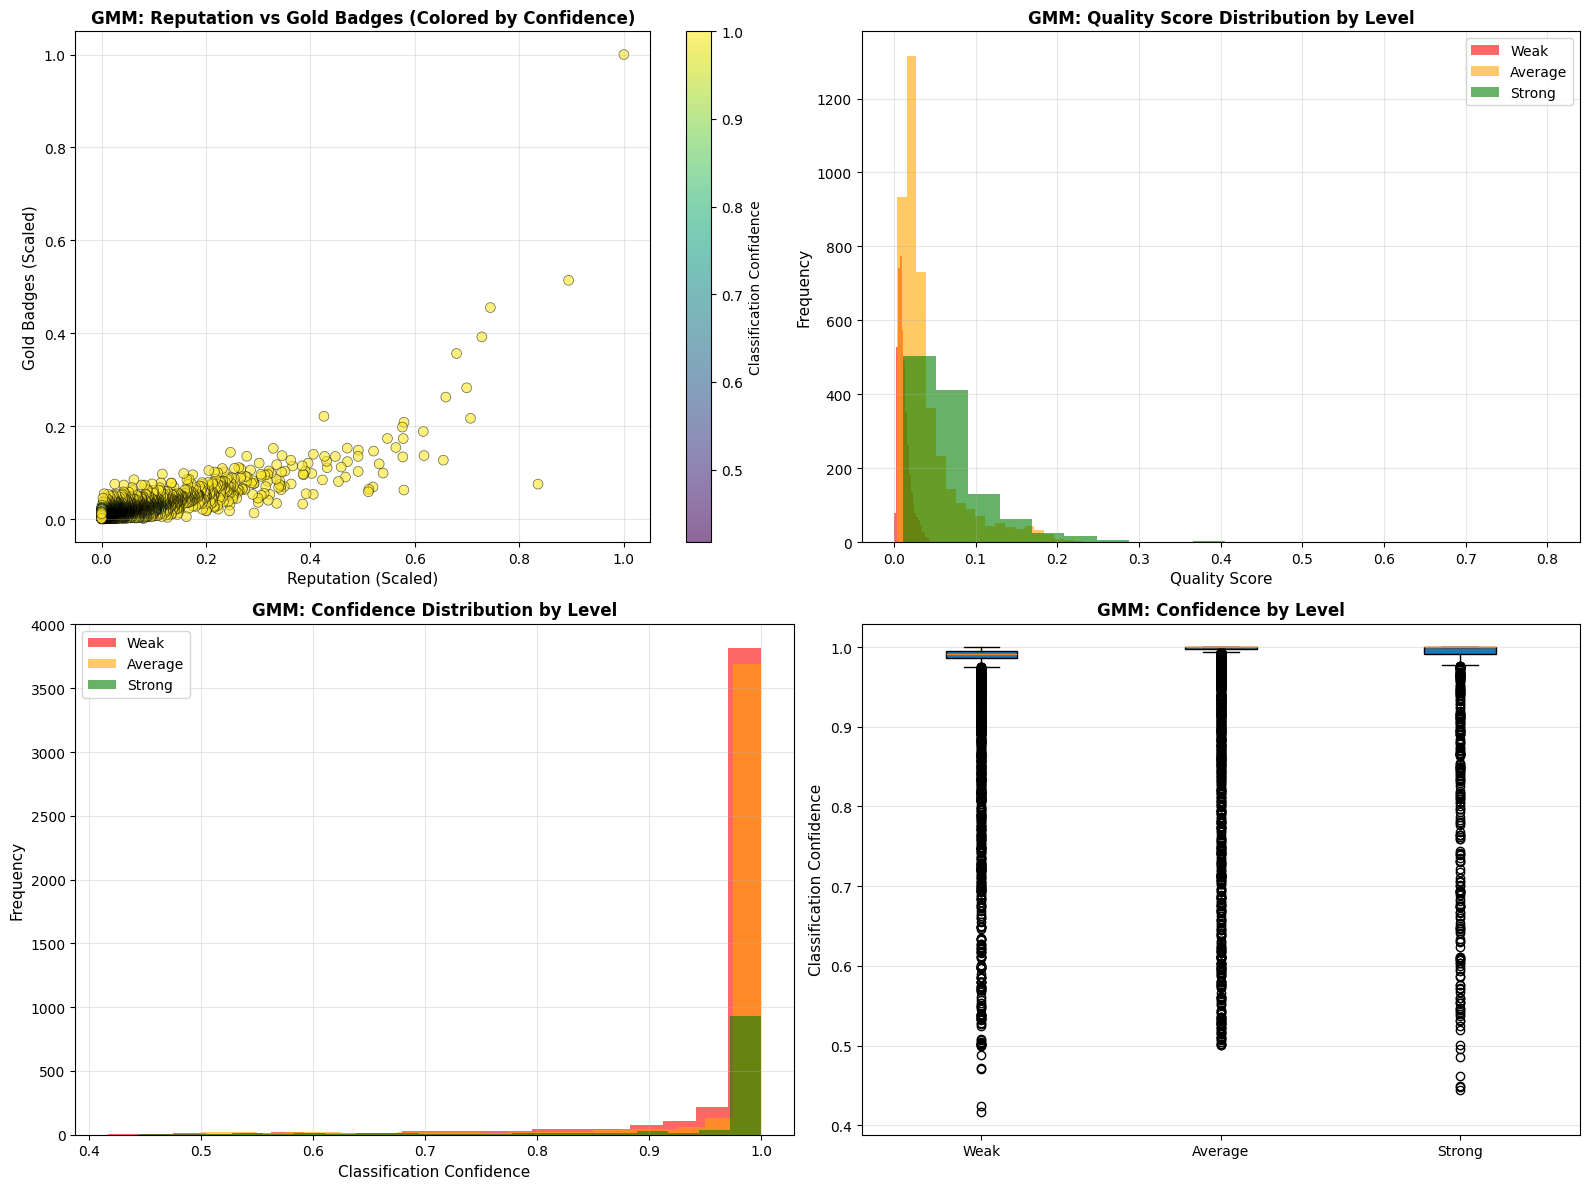

✓ Gaussian Mixture Model visualizations complete


In [95]:
# === VISUALIZATION: GAUSSIAN MIXTURE MODEL ===
print("\nGenerating Gaussian Mixture Model Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Scatter plot - Reputation vs Gold Badges with confidence coloring
scatter = axes[0, 0].scatter(
    so_scaled[:, 0],  # Reputation
    so_scaled[:, 2],  # Gold badges
    c=gmm_results['confidence'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
cbar = plt.colorbar(scatter, ax=axes[0, 0])
cbar.set_label('Classification Confidence', fontsize=10)
axes[0, 0].set_xlabel('Reputation (Scaled)', fontsize=11)
axes[0, 0].set_ylabel('Gold Badges (Scaled)', fontsize=11)
axes[0, 0].set_title('GMM: Reputation vs Gold Badges (Colored by Confidence)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Quality Score Distribution by Level
for level in ['Weak', 'Average', 'Strong']:
    scores = gmm_results[gmm_results['candidate_level'] == level]['quality_score']
    axes[0, 1].hist(scores, bins=20, label=level, alpha=0.6, color=colors[level])
axes[0, 1].set_xlabel('Quality Score', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('GMM: Quality Score Distribution by Level', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Confidence Distribution by Level
for level in ['Weak', 'Average', 'Strong']:
    conf = gmm_results[gmm_results['candidate_level'] == level]['confidence']
    axes[1, 0].hist(conf, bins=20, label=level, alpha=0.6, color=colors[level])
axes[1, 0].set_xlabel('Classification Confidence', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('GMM: Confidence Distribution by Level', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Box plot of Confidence by Level
conf_by_level = [gmm_results[gmm_results['candidate_level'] == level]['confidence'].values 
                 for level in ['Weak', 'Average', 'Strong']]
axes[1, 1].boxplot(conf_by_level, labels=['Weak', 'Average', 'Strong'], patch_artist=True)
axes[1, 1].set_ylabel('Classification Confidence', fontsize=11)
axes[1, 1].set_title('GMM: Confidence by Level', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Gaussian Mixture Model visualizations complete")

In [96]:
# === ALTERNATIVE CLASSIFICATION MODEL 3: K-NEAREST NEIGHBORS (KNN) ===
print("\n" + "="*80)
print("K-NEAREST NEIGHBORS (KNN) - SEMI-SUPERVISED APPROACH")
print("="*80)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# First, create pseudo-labels using K-means for training
pseudo_labels = kmeans_clusters

# Train KNN classifier on K-means labels
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(so_scaled, pseudo_labels)
knn_clusters = knn_model.predict(so_scaled)

# Get distances to neighbors for confidence scores
distances, indices = knn_model.kneighbors(so_scaled)
knn_confidence = 1.0 / (1.0 + distances.mean(axis=1))  # Inverse distance confidence

# Create results dataframe
knn_results = pd.DataFrame({
    'cluster': knn_clusters,
    'quality_score': so_scaled.mean(axis=1),
    'confidence': knn_confidence
})

# Label clusters using same mapping as K-means (since trained on K-means labels)
knn_results['candidate_level'] = knn_results['cluster'].map(cluster_to_label)

print("\nKNN Classification Results (k=5):")
print(f"Cluster Distribution:\n{knn_results['candidate_level'].value_counts().sort_index()}")
print(f"\nCluster Profiles:")
for level in ['Weak', 'Average', 'Strong']:
    subset = knn_results[knn_results['candidate_level'] == level]
    print(f"{level:10} - Count: {len(subset):5} | Avg Quality Score: {subset['quality_score'].mean():.4f} | Avg Confidence: {subset['confidence'].mean():.4f}")

# Calculate evaluation metrics
sil_score_knn = silhouette_score(so_scaled, knn_clusters)
db_index_knn = davies_bouldin_score(so_scaled, knn_clusters)
ch_score_knn = calinski_harabasz_score(so_scaled, knn_clusters)

# Agreement with K-means (how similar the classifications are)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari_score_knn = adjusted_rand_score(kmeans_clusters, knn_clusters)
nmi_score_knn = normalized_mutual_info_score(kmeans_clusters, knn_clusters)

print(f"\nEvaluation Metrics:")
print(f"  • Silhouette Score:      {sil_score_knn:8.4f} (higher is better, range: [-1, 1])")
print(f"  • Davies-Bouldin Index:  {db_index_knn:8.4f} (lower is better)")
print(f"  • Calinski-Harabasz:     {ch_score_knn:8.4f} (higher is better)")
print(f"  • Agreement with K-means (ARI): {ari_score_knn:8.4f} (range: [-1, 1])")
print(f"  • Normalized Mutual Info:       {nmi_score_knn:8.4f} (range: [0, 1])")

print("\nTop 20 KNN Classified Candidates:")
output_display = so_df[display_cols].copy()
output_display['knn_level'] = knn_results['candidate_level'].values
output_display['knn_confidence'] = knn_results['confidence'].values
print(output_display.head(20).to_string(index=False))


K-NEAREST NEIGHBORS (KNN) - SEMI-SUPERVISED APPROACH

KNN Classification Results (k=5):
Cluster Distribution:
candidate_level
Average    1087
Strong      337
Weak       8576
Name: count, dtype: int64

Cluster Profiles:
Weak       - Count:  8576 | Avg Quality Score: 0.0215 | Avg Confidence: 0.9953
Average    - Count:  1087 | Avg Quality Score: 0.0662 | Avg Confidence: 0.9900
Strong     - Count:   337 | Avg Quality Score: 0.1500 | Avg Confidence: 0.9852

Evaluation Metrics:
  • Silhouette Score:        0.6692 (higher is better, range: [-1, 1])
  • Davies-Bouldin Index:    0.5824 (lower is better)
  • Calinski-Harabasz:     12352.7182 (higher is better)
  • Agreement with K-means (ARI):   0.9961 (range: [-1, 1])
  • Normalized Mutual Info:         0.9836 (range: [0, 1])

Top 20 KNN Classified Candidates:
             display_name  reputation  gold_badges  silver_badges  bronze_badges  days_since_last_access knn_level  knn_confidence
                Jon Skeet     1522375          895     


Generating K-Nearest Neighbors Visualizations...


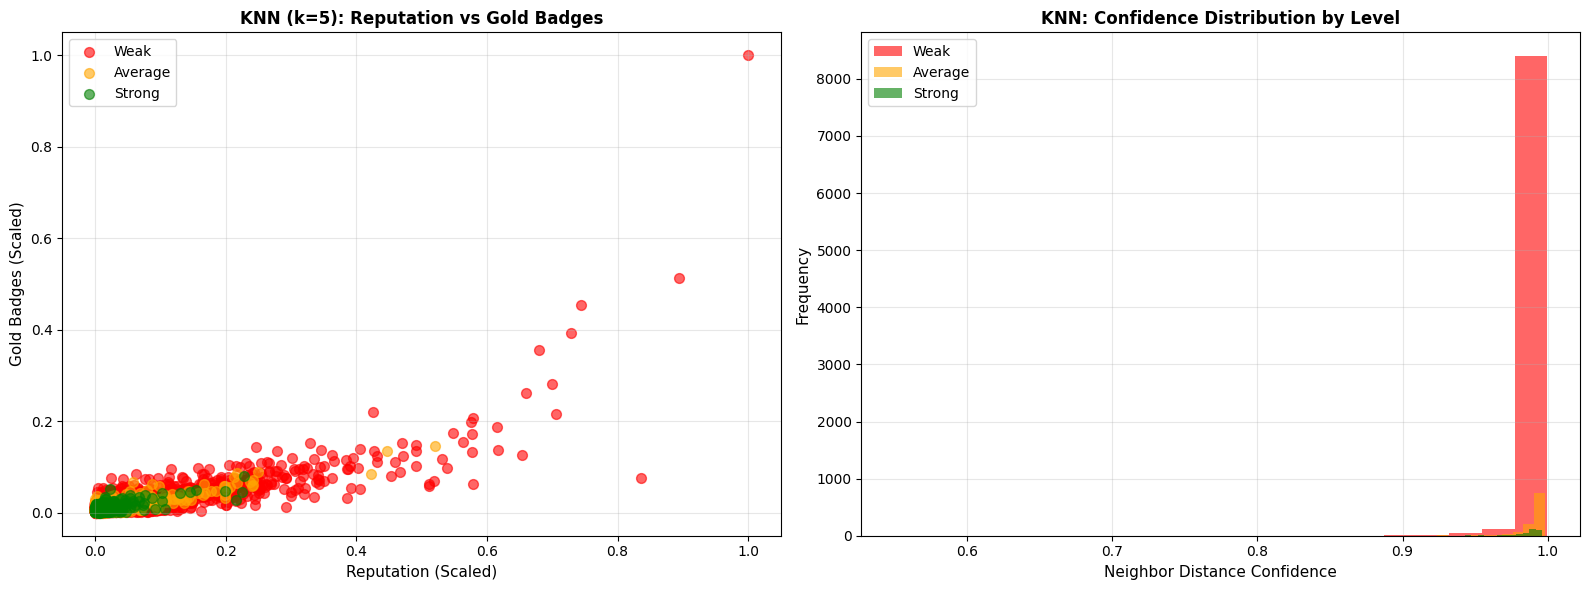

✓ K-Nearest Neighbors visualizations complete


In [97]:
# === VISUALIZATION: K-NEAREST NEIGHBORS ===
print("\nGenerating K-Nearest Neighbors Visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot - Reputation vs Gold Badges
for level in ['Weak', 'Average', 'Strong']:
    mask = knn_results['candidate_level'] == level
    indices = knn_results[mask].index
    axes[0].scatter(
        so_scaled[indices, 0],  # Reputation (scaled)
        so_scaled[indices, 2],  # Gold badges (scaled)
        label=level,
        alpha=0.6,
        s=50,
        color=colors[level]
    )

axes[0].set_xlabel('Reputation (Scaled)', fontsize=11)
axes[0].set_ylabel('Gold Badges (Scaled)', fontsize=11)
axes[0].set_title('KNN (k=5): Reputation vs Gold Badges', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Confidence Distribution by Level
for level in ['Weak', 'Average', 'Strong']:
    conf = knn_results[knn_results['candidate_level'] == level]['confidence']
    axes[1].hist(conf, bins=20, label=level, alpha=0.6, color=colors[level])
axes[1].set_xlabel('Neighbor Distance Confidence', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('KNN: Confidence Distribution by Level', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ K-Nearest Neighbors visualizations complete")

In [98]:
# === ALTERNATIVE CLASSIFICATION MODEL 4: RANDOM FOREST ===
print("\n" + "="*80)
print("RANDOM FOREST - SUPERVISED CLASSIFICATION")
print("="*80)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train Random Forest on K-means pseudo-labels
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
rf_model.fit(so_scaled, pseudo_labels)
rf_clusters = rf_model.predict(so_scaled)
rf_proba = rf_model.predict_proba(so_scaled)  # Get probability for each class

# Create results dataframe
rf_results = pd.DataFrame({
    'cluster': rf_clusters,
    'quality_score': so_scaled.mean(axis=1),
    'confidence': rf_proba.max(axis=1)  # Maximum probability across classes
})

# Label clusters using same mapping as K-means
rf_results['candidate_level'] = rf_results['cluster'].map(cluster_to_label)

print("\nRandom Forest Classification Results (n_estimators=100):")
print(f"Cluster Distribution:\n{rf_results['candidate_level'].value_counts().sort_index()}")
print(f"\nCluster Profiles:")
for level in ['Weak', 'Average', 'Strong']:
    subset = rf_results[rf_results['candidate_level'] == level]
    print(f"{level:10} - Count: {len(subset):5} | Avg Quality Score: {subset['quality_score'].mean():.4f} | Avg Confidence: {subset['confidence'].mean():.4f}")

# Feature Importance
feature_names = ['reputation', 'gold_badges', 'silver_badges', 'bronze_badges', 'days_since_last_access']
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Random Forest):")
for idx, row in feature_importance_df.iterrows():
    print(f"  • {row['feature']:25} - {row['importance']:.4f}")

# Calculate evaluation metrics
sil_score_rf = silhouette_score(so_scaled, rf_clusters)
db_index_rf = davies_bouldin_score(so_scaled, rf_clusters)
ch_score_rf = calinski_harabasz_score(so_scaled, rf_clusters)

# Agreement with K-means
ari_score_rf = adjusted_rand_score(kmeans_clusters, rf_clusters)
nmi_score_rf = normalized_mutual_info_score(kmeans_clusters, rf_clusters)

# Cross-validation score
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), 
                            so_scaled, pseudo_labels, cv=5, scoring='accuracy')

print(f"\nEvaluation Metrics:")
print(f"  • Silhouette Score:      {sil_score_rf:8.4f} (higher is better, range: [-1, 1])")
print(f"  • Davies-Bouldin Index:  {db_index_rf:8.4f} (lower is better)")
print(f"  • Calinski-Harabasz:     {ch_score_rf:8.4f} (higher is better)")
print(f"  • Agreement with K-means (ARI): {ari_score_rf:8.4f} (range: [-1, 1])")
print(f"  • Normalized Mutual Info:       {nmi_score_rf:8.4f} (range: [0, 1])")
print(f"  • Cross-Validation Accuracy:    {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\nTop 20 Random Forest Classified Candidates:")
output_display = so_df[display_cols].copy()
output_display['rf_level'] = rf_results['candidate_level'].values
output_display['rf_confidence'] = rf_results['confidence'].values
print(output_display.head(20).to_string(index=False))


RANDOM FOREST - SUPERVISED CLASSIFICATION

Random Forest Classification Results (n_estimators=100):
Cluster Distribution:
candidate_level
Average    1088
Strong      339
Weak       8573
Name: count, dtype: int64

Cluster Profiles:
Weak       - Count:  8573 | Avg Quality Score: 0.0214 | Avg Confidence: 0.9989
Average    - Count:  1088 | Avg Quality Score: 0.0661 | Avg Confidence: 0.9842
Strong     - Count:   339 | Avg Quality Score: 0.1502 | Avg Confidence: 0.9655

Feature Importance (Random Forest):
  • days_since_last_access    - 0.9655
  • bronze_badges             - 0.0163
  • silver_badges             - 0.0074
  • gold_badges               - 0.0060
  • reputation                - 0.0048

Evaluation Metrics:
  • Silhouette Score:        0.6687 (higher is better, range: [-1, 1])
  • Davies-Bouldin Index:    0.5834 (lower is better)
  • Calinski-Harabasz:     12358.6707 (higher is better)
  • Agreement with K-means (ARI):   1.0000 (range: [-1, 1])
  • Normalized Mutual Info:         


Generating Random Forest Visualizations...


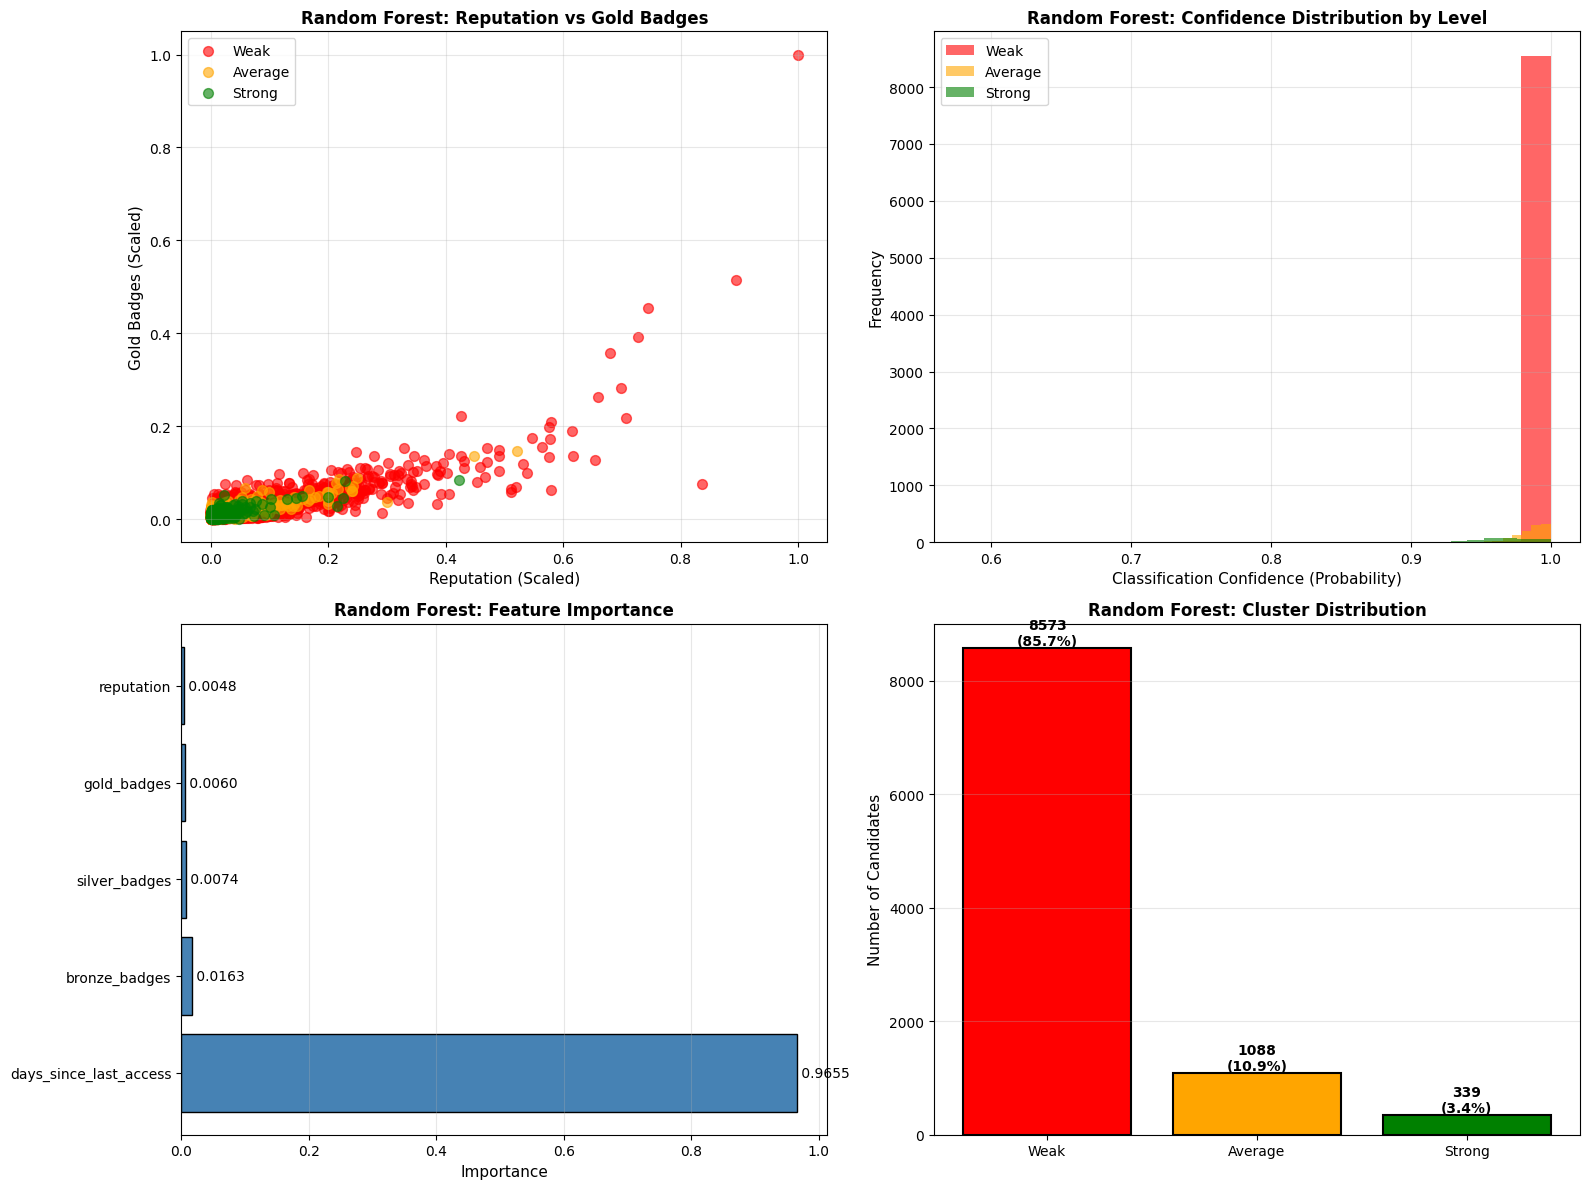

✓ Random Forest visualizations complete


In [99]:
# === VISUALIZATION: RANDOM FOREST ===
print("\nGenerating Random Forest Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Scatter plot - Reputation vs Gold Badges
for level in ['Weak', 'Average', 'Strong']:
    mask = rf_results['candidate_level'] == level
    indices = rf_results[mask].index
    axes[0, 0].scatter(
        so_scaled[indices, 0],  # Reputation (scaled)
        so_scaled[indices, 2],  # Gold badges (scaled)
        label=level,
        alpha=0.6,
        s=50,
        color=colors[level]
    )

axes[0, 0].set_xlabel('Reputation (Scaled)', fontsize=11)
axes[0, 0].set_ylabel('Gold Badges (Scaled)', fontsize=11)
axes[0, 0].set_title('Random Forest: Reputation vs Gold Badges', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Confidence Distribution by Level
for level in ['Weak', 'Average', 'Strong']:
    conf = rf_results[rf_results['candidate_level'] == level]['confidence']
    axes[0, 1].hist(conf, bins=20, label=level, alpha=0.6, color=colors[level])
axes[0, 1].set_xlabel('Classification Confidence (Probability)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Random Forest: Confidence Distribution by Level', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance Bar Chart
feature_names_sorted = feature_importance_df['feature'].values
importances_sorted = feature_importance_df['importance'].values
bars = axes[1, 0].barh(feature_names_sorted, importances_sorted, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Importance', fontsize=11)
axes[1, 0].set_title('Random Forest: Feature Importance', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
for i, (bar, imp) in enumerate(zip(bars, importances_sorted)):
    axes[1, 0].text(imp, i, f' {imp:.4f}', va='center', fontsize=10)

# Plot 4: Cluster Distribution
level_counts = rf_results['candidate_level'].value_counts()
level_order = ['Weak', 'Average', 'Strong']
level_counts = level_counts.reindex(level_order)
bars = axes[1, 1].bar(level_order, level_counts.values, color=[colors[level] for level in level_order], 
                       edgecolor='black', linewidth=1.5)
axes[1, 1].set_ylabel('Number of Candidates', fontsize=11)
axes[1, 1].set_title('Random Forest: Cluster Distribution', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, level_counts.values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(count)}\n({100*count/len(rf_results):.1f}%)',
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Random Forest visualizations complete")

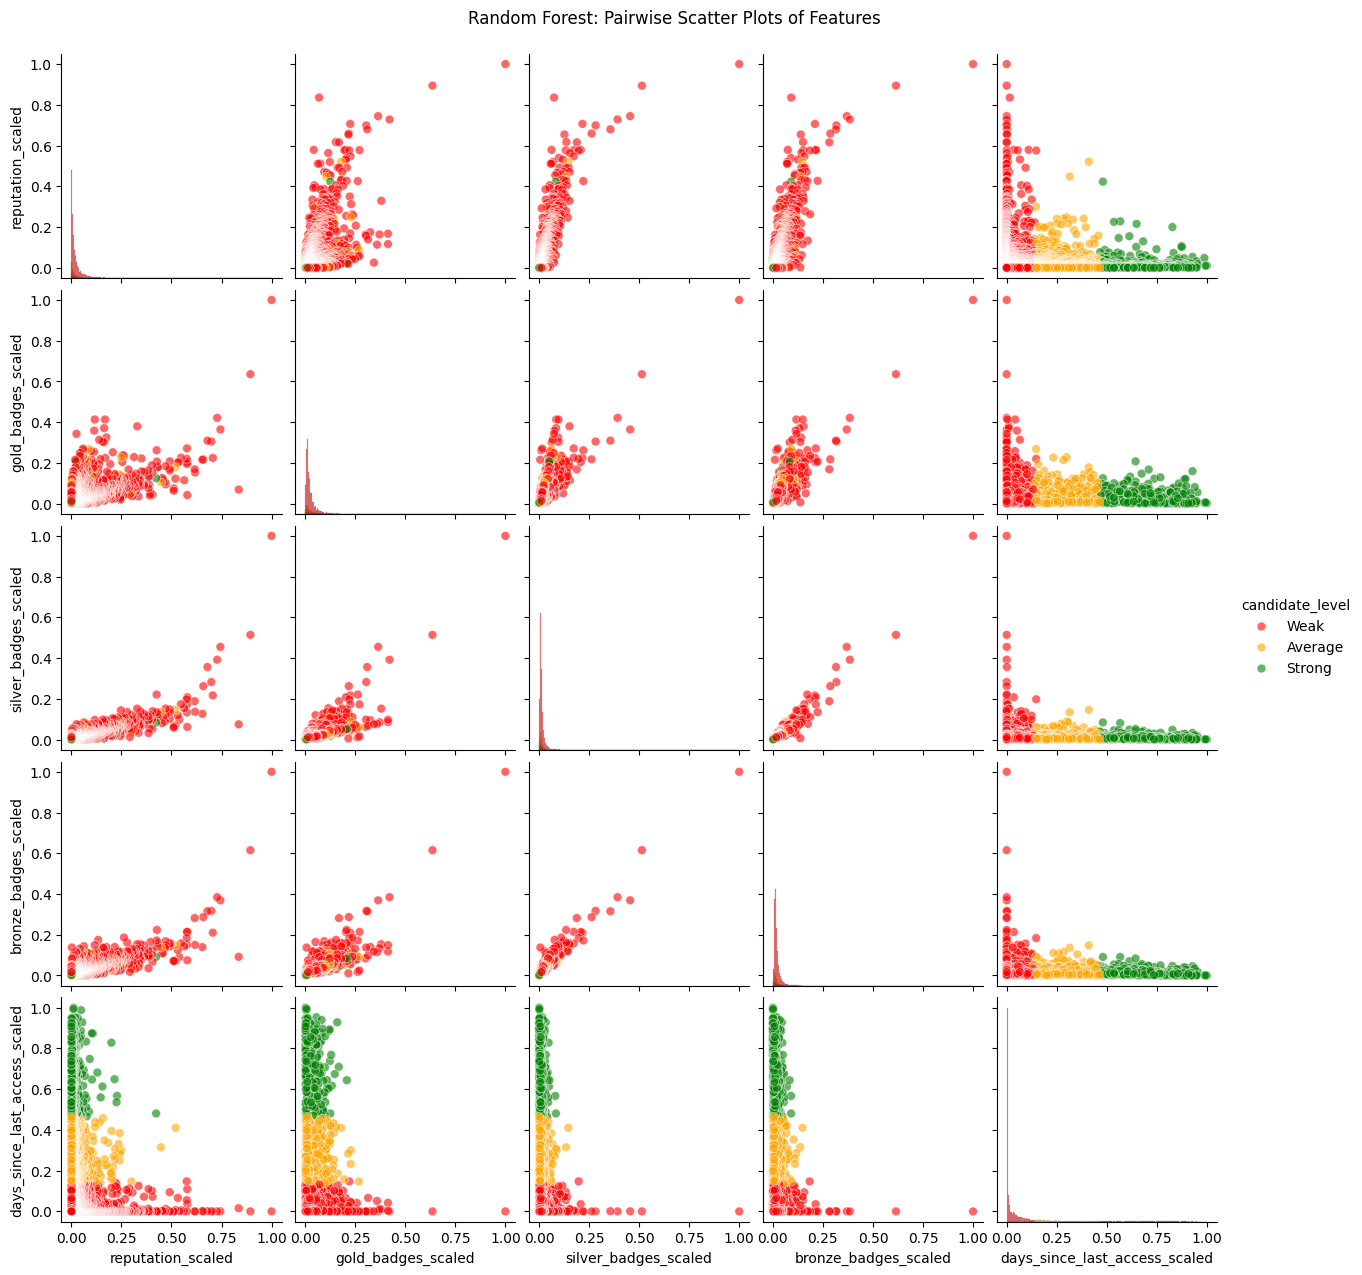

In [107]:
import seaborn as sns
import pandas as pd

# Prepare dataframe with scaled features + Random Forest labels
rf_plot_df = so_df[[f"{col}_scaled" for col in so_features]].copy()
rf_plot_df['candidate_level'] = rf_results['candidate_level']  # Add RF predicted level

# Pairplot: scatter all features vs each other, colored by candidate_level
sns.pairplot(
    rf_plot_df,
    hue='candidate_level',
    palette={'Weak':'red', 'Average':'orange', 'Strong':'green'},
    diag_kind='hist',   # Histogram on the diagonal
    plot_kws={'alpha':0.6, 's':40}  # Marker transparency and size
)

plt.suptitle("Random Forest: Pairwise Scatter Plots of Features", y=1.02)
plt.show()


C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\1879684756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


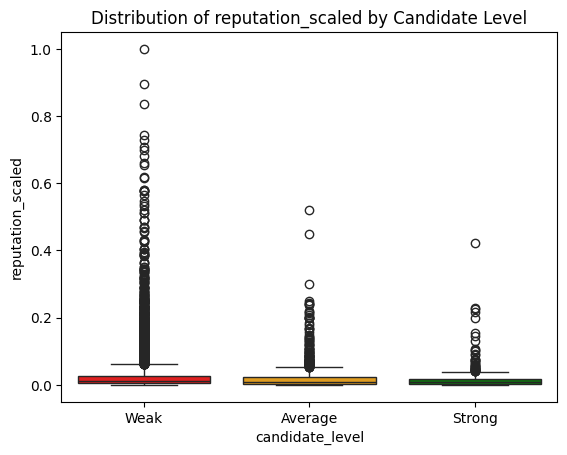

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\1879684756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


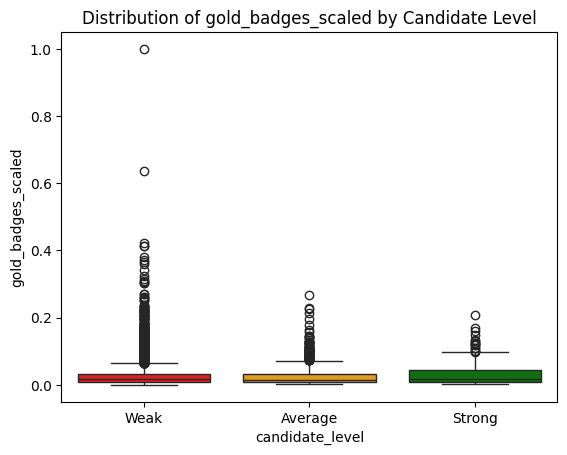

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\1879684756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


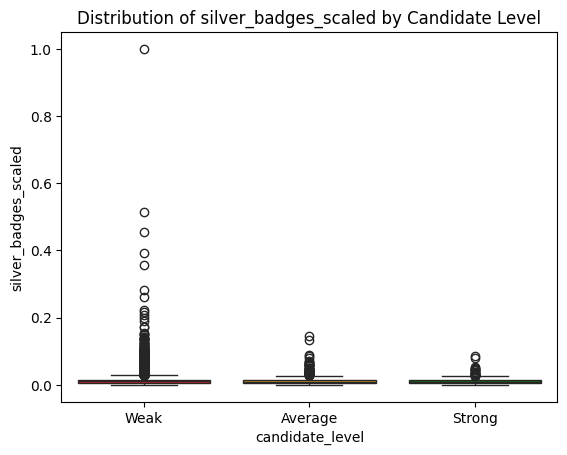

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\1879684756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


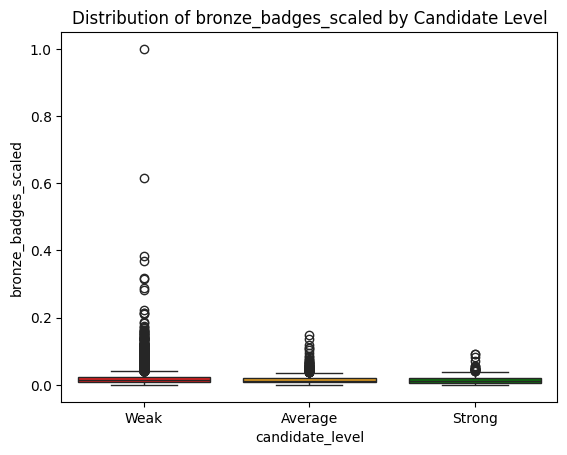

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\1879684756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


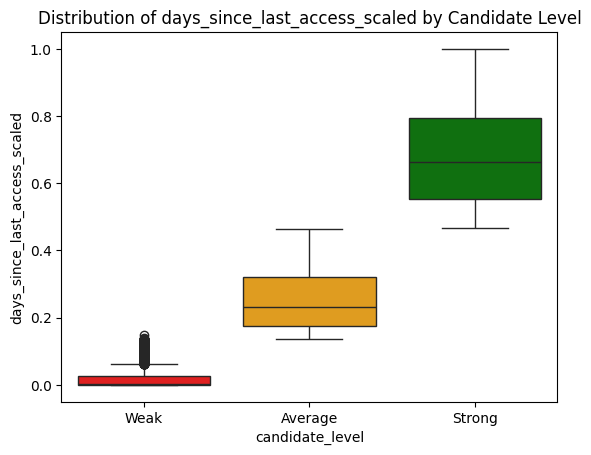

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in rf_plot_df.columns[:-1]:  # exclude candidate_level
    plt.figure()
    sns.boxplot(
        x='candidate_level',
        y=col,
        data=rf_plot_df,
        palette={'Weak':'red', 'Average':'orange', 'Strong':'green'}
    )
    plt.title(f"Distribution of {col} by Candidate Level")
    plt.show()


C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\2909848066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


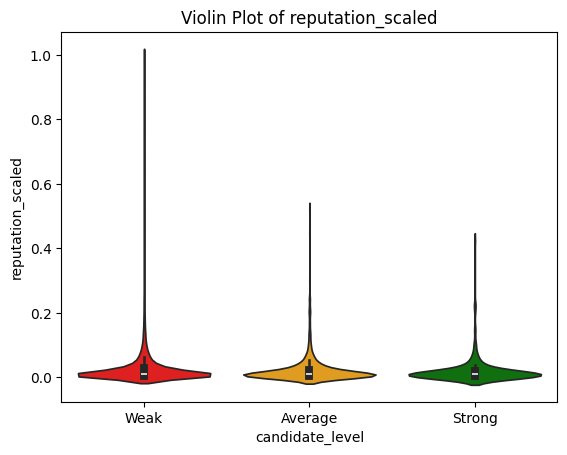

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\2909848066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


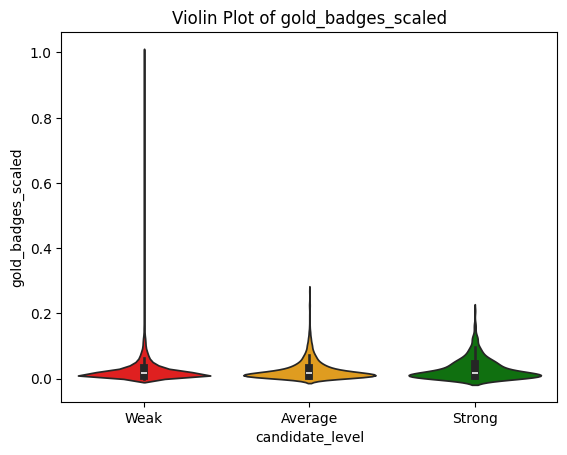

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\2909848066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


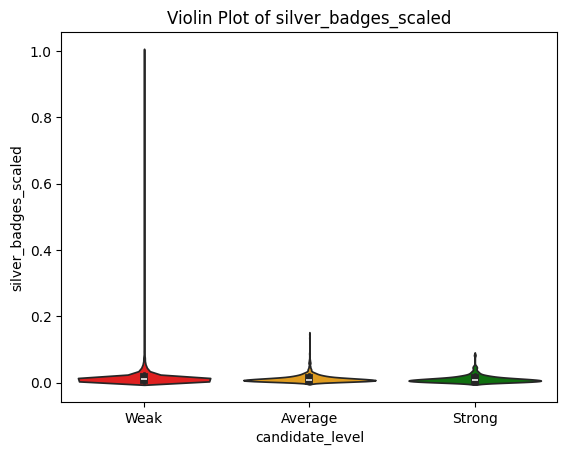

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\2909848066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


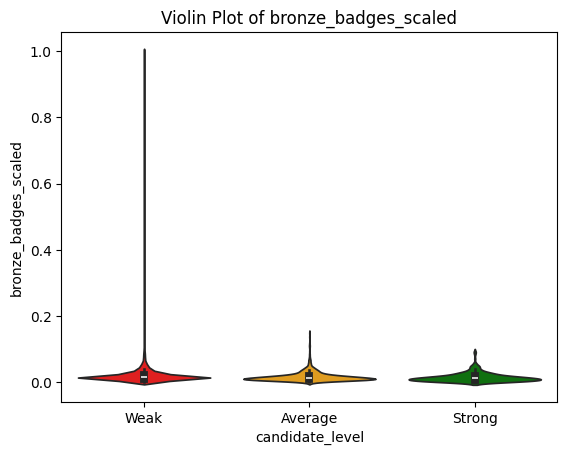

C:\Users\Anish\AppData\Local\Temp\ipykernel_5284\2909848066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


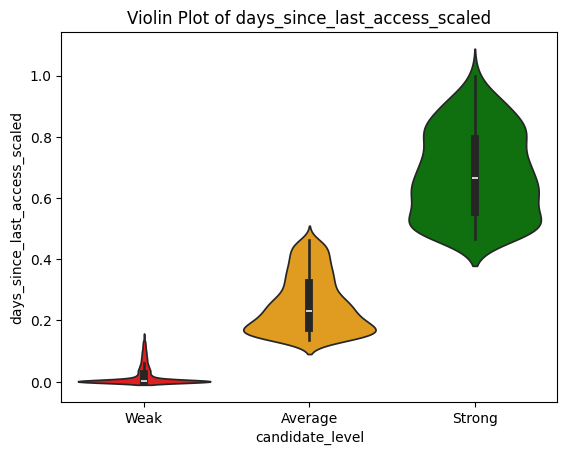

In [114]:
for col in rf_plot_df.columns[:-1]:
    plt.figure()
    sns.violinplot(
        x='candidate_level',
        y=col,
        data=rf_plot_df,
        palette={'Weak':'red', 'Average':'orange', 'Strong':'green'}
    )
    plt.title(f"Violin Plot of {col}")
    plt.show()


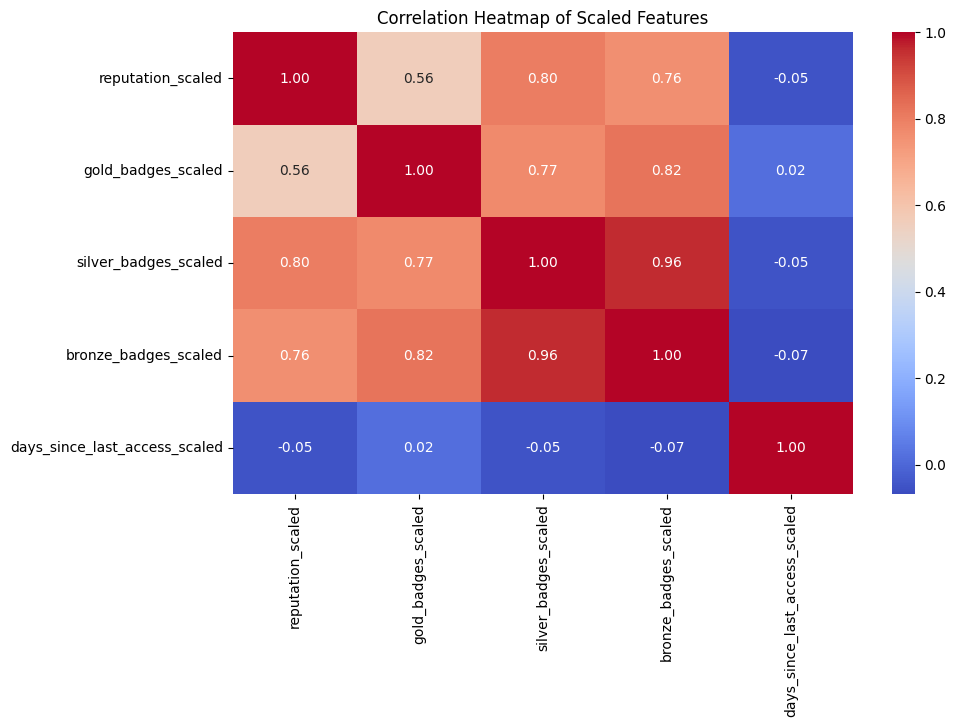

In [115]:
plt.figure(figsize=(10, 6))
corr = rf_plot_df.drop(columns='candidate_level').corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap of Scaled Features")
plt.show()


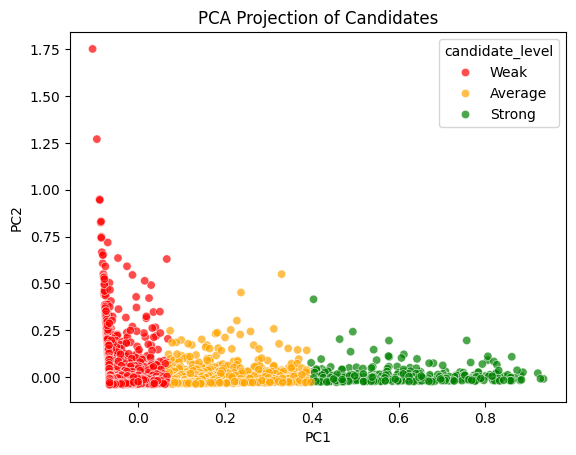

In [116]:
from sklearn.decomposition import PCA

X = rf_plot_df.drop(columns='candidate_level')
y = rf_plot_df['candidate_level']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['candidate_level'] = y.values

plt.figure()
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='candidate_level',
    data=pca_df,
    palette={'Weak':'red', 'Average':'orange', 'Strong':'green'},
    alpha=0.7
)
plt.title("PCA Projection of Candidates")
plt.show()


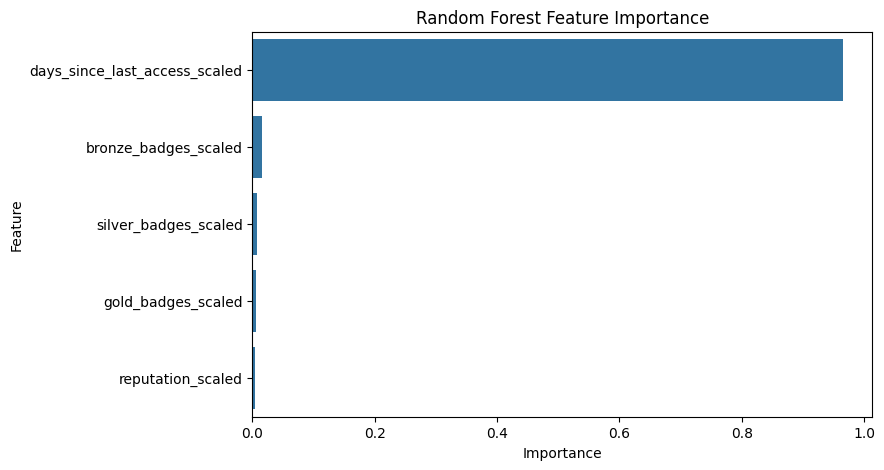

In [117]:
import numpy as np

importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df
)
plt.title("Random Forest Feature Importance")
plt.show()


In [92]:
# === COMPARISON ANALYSIS: ALL MODELS ===
print("\n" + "="*80)
print("COMPREHENSIVE COMPARISON - ALL CLASSIFICATION MODELS")
print("="*80)

# Create comparison dataframe with all model results
comparison_results = pd.DataFrame({
    'kmeans_level': kmeans_results['candidate_level'].values,
    'hierarchical_level': hierarchical_results['candidate_level'].values,
    'gmm_level': gmm_results['candidate_level'].values,
    'knn_level': knn_results['candidate_level'].values,
    'rf_level': rf_results['candidate_level'].values
})

# Add evaluation metrics comparison
print("\nEVALUATION METRICS COMPARISON:")
print("="*80)
metrics_comparison = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'GMM', 'KNN', 'Random Forest'],
    'Silhouette': [sil_score, sil_score_h, sil_score_gmm, sil_score_knn, sil_score_rf],
    'Davies-Bouldin': [db_index, db_index_h, db_index_gmm, db_index_knn, db_index_rf],
    'Calinski-Harabasz': [ch_score, ch_score_h, ch_score_gmm, ch_score_knn, ch_score_rf]
})

print(metrics_comparison.to_string(index=False))

# Cluster distribution comparison
print("\n\nCLUSTER DISTRIBUTION COMPARISON:")
print("="*80)
for level in ['Weak', 'Average', 'Strong']:
    k_count = (kmeans_results['candidate_level'] == level).sum()
    h_count = (hierarchical_results['candidate_level'] == level).sum()
    g_count = (gmm_results['candidate_level'] == level).sum()
    knn_count = (knn_results['candidate_level'] == level).sum()
    rf_count = (rf_results['candidate_level'] == level).sum()
    
    print(f"\n{level:10} Level:")
    print(f"  K-Means:       {k_count:4} ({100*k_count/len(so_df):5.1f}%)")
    print(f"  Hierarchical:  {h_count:4} ({100*h_count/len(so_df):5.1f}%)")
    print(f"  GMM:           {g_count:4} ({100*g_count/len(so_df):5.1f}%)")
    print(f"  KNN:           {knn_count:4} ({100*knn_count/len(so_df):5.1f}%)")
    print(f"  Random Forest: {rf_count:4} ({100*rf_count/len(so_df):5.1f}%)")

# Pairwise agreement analysis
print("\n\nPAIRWISE AGREEMENT (Adjusted Rand Index):")
print("="*80)

from itertools import combinations

model_names = ['K-Means', 'Hierarchical', 'GMM', 'KNN', 'Random Forest']
model_clusters = [kmeans_clusters, hierarchical_clusters, gmm_clusters, knn_clusters, rf_clusters]

print(f"{'Model 1':15} {'Model 2':15} {'ARI Score':>12} {'Interpretation'}")
print("-"*60)

for (i, name1), (j, name2) in combinations(enumerate(model_names), 2):
    ari = adjusted_rand_score(model_clusters[i], model_clusters[j])
    if ari > 0.7:
        interp = "Strong Agreement"
    elif ari > 0.4:
        interp = "Moderate Agreement"
    else:
        interp = "Weak Agreement"
    print(f"{name1:15} {name2:15} {ari:12.4f} {interp}")

# Model robustness analysis
print("\n\nMODEL CONSISTENCY (comparing candidate-level predictions):")
print("="*80)

# Count how many candidates are classified consistently across all 5 models
consistent_mask = (
    (comparison_results['kmeans_level'] == comparison_results['hierarchical_level']) &
    (comparison_results['kmeans_level'] == comparison_results['gmm_level']) &
    (comparison_results['kmeans_level'] == comparison_results['knn_level']) &
    (comparison_results['kmeans_level'] == comparison_results['rf_level'])
)

consistent_count = consistent_mask.sum()
print(f"Candidates classified CONSISTENTLY across all 5 models: {consistent_count} ({100*consistent_count/len(so_df):.1f}%)")

# Conflicting predictions
conflict_mask = ~consistent_mask
conflict_count = conflict_mask.sum()
print(f"Candidates with CONFLICTING predictions: {conflict_count} ({100*conflict_count/len(so_df):.1f}%)")

if conflict_count > 0:
    print(f"\nSample of conflicting predictions (first 10):")
    conflict_indices = conflict_mask[conflict_mask].index[:10]
    print(comparison_results.loc[conflict_indices].to_string())


COMPREHENSIVE COMPARISON - ALL CLASSIFICATION MODELS

EVALUATION METRICS COMPARISON:
        Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
      K-Means    0.668740        0.583380       12358.670679
 Hierarchical    0.658718        0.599065       11641.321010
          GMM    0.202420        1.583141        1500.868100
          KNN    0.669183        0.582449       12352.718228
Random Forest    0.668740        0.583380       12358.670679


CLUSTER DISTRIBUTION COMPARISON:

Weak       Level:
  K-Means:       8573 ( 85.7%)
  Hierarchical:  8382 ( 83.8%)
  GMM:           4564 ( 45.6%)
  KNN:           8576 ( 85.8%)
  Random Forest: 8573 ( 85.7%)

Average    Level:
  K-Means:       1088 ( 10.9%)
  Hierarchical:  1361 ( 13.6%)
  GMM:           4274 ( 42.7%)
  KNN:           1087 ( 10.9%)
  Random Forest: 1088 ( 10.9%)

Strong     Level:
  K-Means:        339 (  3.4%)
  Hierarchical:   257 (  2.6%)
  GMM:           1162 ( 11.6%)
  KNN:            337 (  3.4%)
  Random Forest:  339 


Generating Comprehensive Comparison Visualizations...


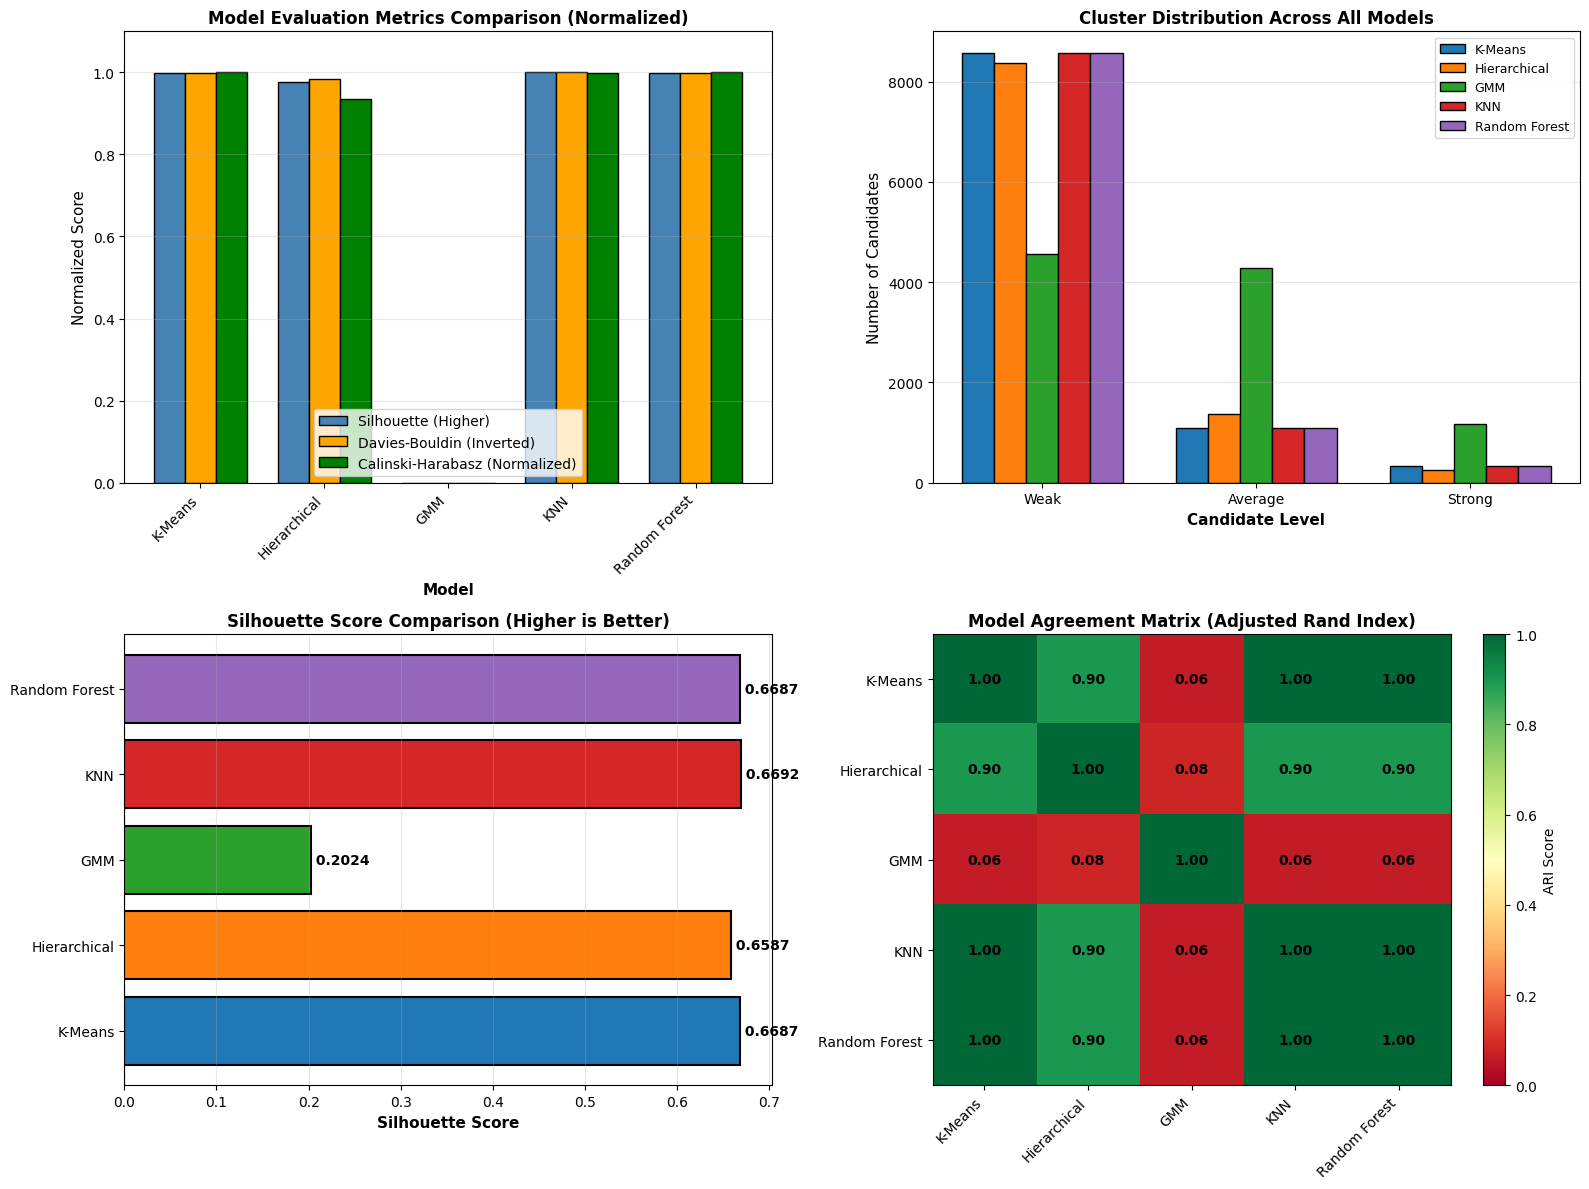

✓ Comprehensive comparison visualizations complete


In [100]:
# === VISUALIZATION: COMPREHENSIVE MODEL COMPARISON ===
print("\nGenerating Comprehensive Comparison Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Evaluation Metrics Heatmap-style Comparison
models = ['K-Means', 'Hierarchical', 'GMM', 'KNN', 'Random Forest']
silhouette_scores = [sil_score, sil_score_h, sil_score_gmm, sil_score_knn, sil_score_rf]
davies_bouldin_scores = [db_index, db_index_h, db_index_gmm, db_index_knn, db_index_rf]
calinski_harabasz_scores = [ch_score, ch_score_h, ch_score_gmm, ch_score_knn, ch_score_rf]

# Normalize scores for visualization
from sklearn.preprocessing import MinMaxScaler as MMScaler
mm_scaler = MMScaler()
metrics_array = np.array([silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores]).T
# For davies_bouldin, lower is better, so we need to invert
davies_normalized = 1 - (np.array(davies_bouldin_scores) - min(davies_bouldin_scores)) / (max(davies_bouldin_scores) - min(davies_bouldin_scores))
sil_normalized = (np.array(silhouette_scores) - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
ch_normalized = (np.array(calinski_harabasz_scores) - min(calinski_harabasz_scores)) / (max(calinski_harabasz_scores) - min(calinski_harabasz_scores))

x = np.arange(len(models))
width = 0.25
axes[0, 0].bar(x - width, sil_normalized, width, label='Silhouette (Higher)', color='steelblue', edgecolor='black')
axes[0, 0].bar(x, davies_normalized, width, label='Davies-Bouldin (Inverted)', color='orange', edgecolor='black')
axes[0, 0].bar(x + width, ch_normalized, width, label='Calinski-Harabasz (Normalized)', color='green', edgecolor='black')
axes[0, 0].set_xlabel('Model', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Normalized Score', fontsize=11)
axes[0, 0].set_title('Model Evaluation Metrics Comparison (Normalized)', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1.1])

# Plot 2: Cluster Distribution Comparison
levels = ['Weak', 'Average', 'Strong']
k_dists = [(kmeans_results['candidate_level'] == l).sum() for l in levels]
h_dists = [(hierarchical_results['candidate_level'] == l).sum() for l in levels]
g_dists = [(gmm_results['candidate_level'] == l).sum() for l in levels]
knn_dists = [(knn_results['candidate_level'] == l).sum() for l in levels]
rf_dists = [(rf_results['candidate_level'] == l).sum() for l in levels]

x = np.arange(len(levels))
width = 0.15
axes[0, 1].bar(x - 2*width, k_dists, width, label='K-Means', edgecolor='black')
axes[0, 1].bar(x - width, h_dists, width, label='Hierarchical', edgecolor='black')
axes[0, 1].bar(x, g_dists, width, label='GMM', edgecolor='black')
axes[0, 1].bar(x + width, knn_dists, width, label='KNN', edgecolor='black')
axes[0, 1].bar(x + 2*width, rf_dists, width, label='Random Forest', edgecolor='black')
axes[0, 1].set_xlabel('Candidate Level', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Number of Candidates', fontsize=11)
axes[0, 1].set_title('Cluster Distribution Across All Models', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(levels)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Silhouette Scores Comparison
silhouette_data = [sil_score, sil_score_h, sil_score_gmm, sil_score_knn, sil_score_rf]
colors_models = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = axes[1, 0].barh(models, silhouette_data, color=colors_models, edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Silhouette Score Comparison (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
for i, (bar, score) in enumerate(zip(bars, silhouette_data)):
    axes[1, 0].text(score, i, f' {score:.4f}', va='center', fontsize=10, fontweight='bold')

# Plot 4: Model Agreement (ARI) Matrix
from itertools import combinations
model_names = ['K-Means', 'Hierarchical', 'GMM', 'KNN', 'Random Forest']
model_clusters_list = [kmeans_clusters, hierarchical_clusters, gmm_clusters, knn_clusters, rf_clusters]
n_models = len(model_names)
ari_matrix = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(n_models):
        if i == j:
            ari_matrix[i, j] = 1.0
        else:
            ari_matrix[i, j] = adjusted_rand_score(model_clusters_list[i], model_clusters_list[j])

im = axes[1, 1].imshow(ari_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
axes[1, 1].set_xticks(np.arange(n_models))
axes[1, 1].set_yticks(np.arange(n_models))
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 1].set_yticklabels(model_names)
axes[1, 1].set_title('Model Agreement Matrix (Adjusted Rand Index)', fontsize=12, fontweight='bold')

# Add text annotations
for i in range(n_models):
    for j in range(n_models):
        text = axes[1, 1].text(j, i, f'{ari_matrix[i, j]:.2f}',
                              ha="center", va="center", color="black", fontweight='bold', fontsize=10)

cbar = plt.colorbar(im, ax=axes[1, 1])
cbar.set_label('ARI Score', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Comprehensive comparison visualizations complete")

In [102]:
# === SAVE ALL MODEL RESULTS ===
print("\n" + "="*80)
print("SAVING COMPREHENSIVE MODEL COMPARISON RESULTS")
print("="*80)

# Create comprehensive output dataframe with all model predictions
comprehensive_output = pd.DataFrame({
    'user_id': so_df['user_id'].values,
    'display_name': so_df['display_name'].values,
    'reputation': so_df['reputation'].values,
    'gold_badges': so_df['gold_badges'].values,
    'silver_badges': so_df['silver_badges'].values,
    'bronze_badges': so_df['bronze_badges'].values,
    'days_since_last_access': so_df['days_since_last_access'].values,
    'quality_score': so_scaled.mean(axis=1),
    'kmeans_level': kmeans_results['candidate_level'].values,
    'hierarchical_level': hierarchical_results['candidate_level'].values,
    'gmm_level': gmm_results['candidate_level'].values,
    'knn_level': knn_results['candidate_level'].values,
    'rf_level': rf_results['candidate_level'].values,
    'gmm_confidence': gmm_results['confidence'].values,
    'rf_confidence': rf_results['confidence'].values
})

# Save comprehensive results
try:
    comprehensive_output.to_csv('global_candidates_all_models_classified.csv', index=False)
    print("\n✓ Comprehensive results saved to: global_candidates_all_models_classified.csv")
    print(f"  • Total Records: {len(comprehensive_output)}")
    print(f"  • Columns: {len(comprehensive_output.columns)}")
except Exception as e:
    print(f"\n⚠ Could not save file: {str(e)}")

# Save metrics summary
metrics_summary = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical Clustering', 'GMM', 'KNN (k=5)', 'Random Forest'],
    'Silhouette Score': [sil_score, sil_score_h, sil_score_gmm, sil_score_knn, sil_score_rf],
    'Davies-Bouldin Index': [db_index, db_index_h, db_index_gmm, db_index_knn, db_index_rf],
    'Calinski-Harabasz Score': [ch_score, ch_score_h, ch_score_gmm, ch_score_knn, ch_score_rf],
    'Weak Count': [
        (kmeans_results['candidate_level'] == 'Weak').sum(),
        (hierarchical_results['candidate_level'] == 'Weak').sum(),
        (gmm_results['candidate_level'] == 'Weak').sum(),
        (knn_results['candidate_level'] == 'Weak').sum(),
        (rf_results['candidate_level'] == 'Weak').sum()
    ],
    'Average Count': [
        (kmeans_results['candidate_level'] == 'Average').sum(),
        (hierarchical_results['candidate_level'] == 'Average').sum(),
        (gmm_results['candidate_level'] == 'Average').sum(),
        (knn_results['candidate_level'] == 'Average').sum(),
        (rf_results['candidate_level'] == 'Average').sum()
    ],
    'Strong Count': [
        (kmeans_results['candidate_level'] == 'Strong').sum(),
        (hierarchical_results['candidate_level'] == 'Strong').sum(),
        (gmm_results['candidate_level'] == 'Strong').sum(),
        (knn_results['candidate_level'] == 'Strong').sum(),
        (rf_results['candidate_level'] == 'Strong').sum()
    ]
})

try:
    metrics_summary.to_csv('model_comparison_metrics.csv', index=False)
    print("✓ Model comparison metrics saved to: model_comparison_metrics.csv")
except Exception as e:
    print(f"⚠ Could not save metrics file: {str(e)}")

print("\n\nFINAL MODEL COMPARISON SUMMARY:")
print("="*80)
print(metrics_summary.to_string(index=False))

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nFiles Generated:")
print("  1. global_candidates_kmeans_classified.csv - K-Means results")
print("  2. global_candidates_all_models_classified.csv - All model predictions")
print("  3. model_comparison_metrics.csv - Evaluation metrics for all models")


SAVING COMPREHENSIVE MODEL COMPARISON RESULTS

✓ Comprehensive results saved to: global_candidates_all_models_classified.csv
  • Total Records: 10000
  • Columns: 15
✓ Model comparison metrics saved to: model_comparison_metrics.csv


FINAL MODEL COMPARISON SUMMARY:
                  Model  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score  Weak Count  Average Count  Strong Count
                K-Means          0.668740              0.583380             12358.670679        8573           1088           339
Hierarchical Clustering          0.658718              0.599065             11641.321010        8382           1361           257
                    GMM          0.202420              1.583141              1500.868100        4564           4274          1162
              KNN (k=5)          0.669183              0.582449             12352.718228        8576           1087           337
          Random Forest          0.668740              0.583380             12358.6